In [20]:
# 1. Install library
!pip install transformers --quiet
!pip install torch --quiet

In [21]:
# 2. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from google.colab import drive

In [22]:
# 3. Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# 4. Load Dataset SIGINT Realistis
sigint = pd.read_csv('/content/drive/MyDrive/datasets/DatasetUAS/Reviews.csv')
sigint = sigint[['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
                 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']].dropna()

# Sampling agar ringan di Google Colab
sigint = sigint.sample(n=3000, random_state=42)

# Konversi kolom Time menjadi tanggal
sigint['Date'] = pd.to_datetime(sigint['Time'], unit='s')
sigint['Month'] = sigint['Date'].dt.to_period('M')

# Buat kolom helpfulness ratio
sigint['HelpfulnessRatio'] = sigint['HelpfulnessNumerator'] / sigint['HelpfulnessDenominator']
sigint['HelpfulnessRatio'] = sigint['HelpfulnessRatio'].fillna(0)

In [24]:
# 5. Simulasi Dataset IMINT Realistis
np.random.seed(42)
days = pd.date_range(start='2025-01-01', periods=90)

imint = pd.DataFrame({
    'Date': np.repeat(days, 3),
    'Location': ['Mall A', 'Mall B', 'Pasar C'] * 90,
    'Visitors': np.random.randint(100, 500, 270)
})
imint['Month'] = imint['Date'].dt.to_period('M')

In [25]:
# 6. Analisis Sentimen SIGINT dengan Transformer
sentiment_pipeline = pipeline("sentiment-analysis")

def transformer_sentiment(text):
    try:
        result = sentiment_pipeline(text[:512])[0]  # Batasi input max 512 token
        return result['label']
    except:
        return 'Neutral'

# Analisis untuk sebagian data agar proses cepat
sigint['Sentiment'] = sigint['Text'].apply(transformer_sentiment)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [26]:
# 7. Ringkasan SIGINT
# Sentimen per bulan
sigint_summary = sigint.groupby(['Month', 'Sentiment']).size().reset_index(name='Count')

# Rating distribusi
score_summary = sigint.groupby(['Month', 'Score']).size().reset_index(name='Count')

# Helpfulness distribusi
helpful_summary = sigint.groupby(['Month']).agg({'HelpfulnessRatio': 'mean'}).reset_index()

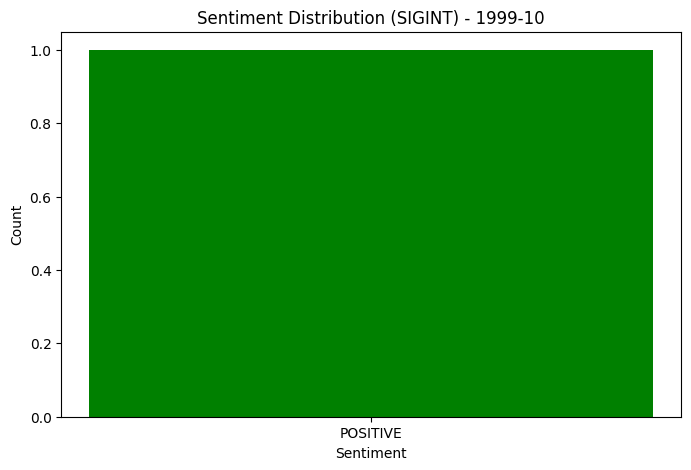

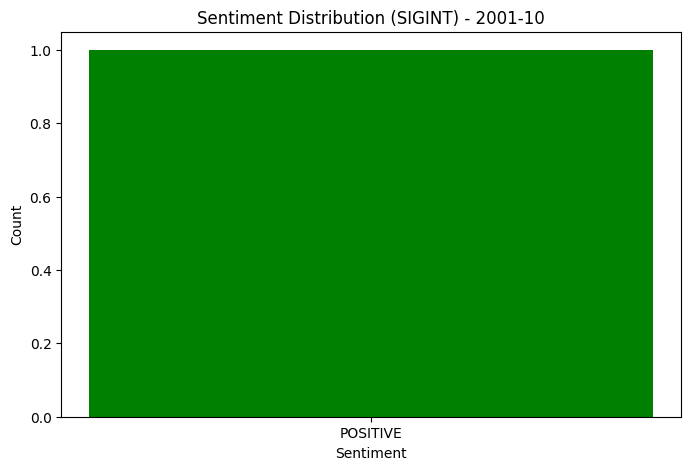

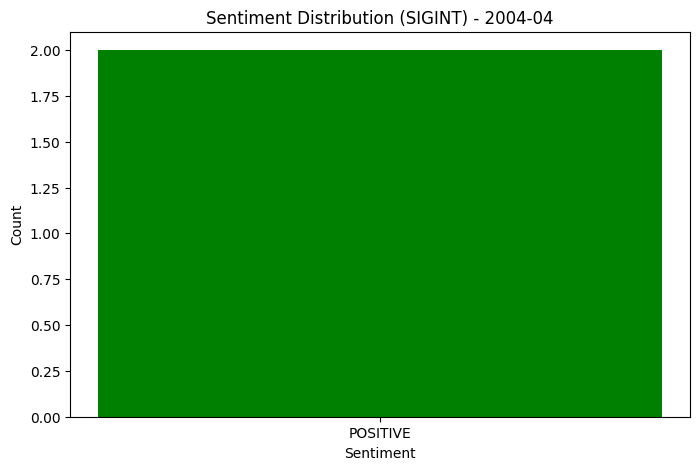

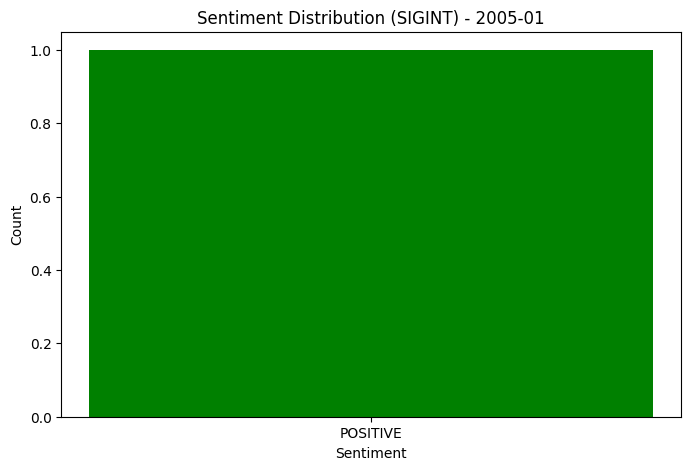

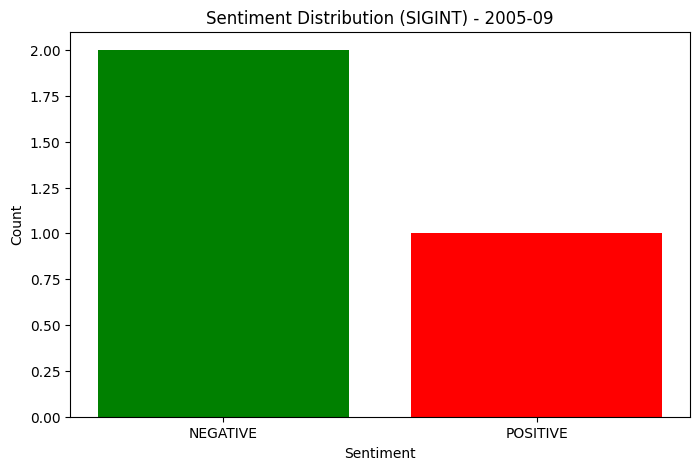

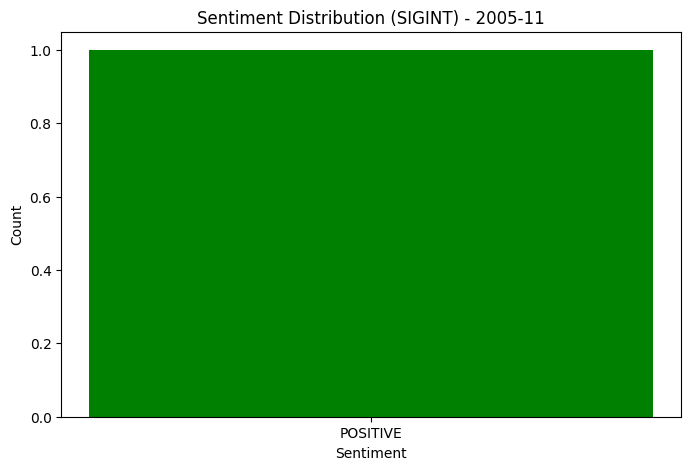

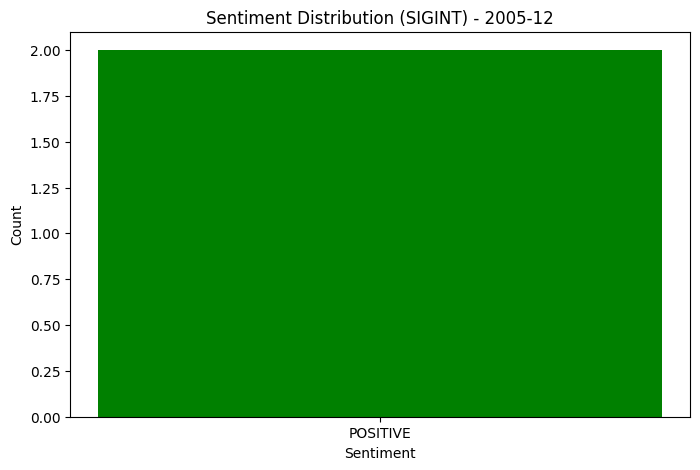

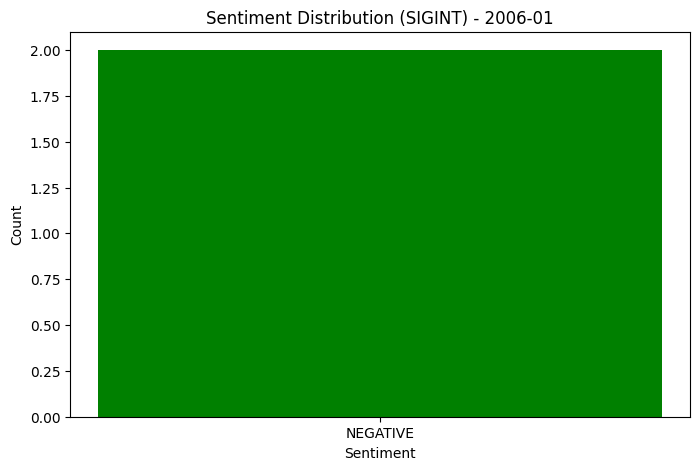

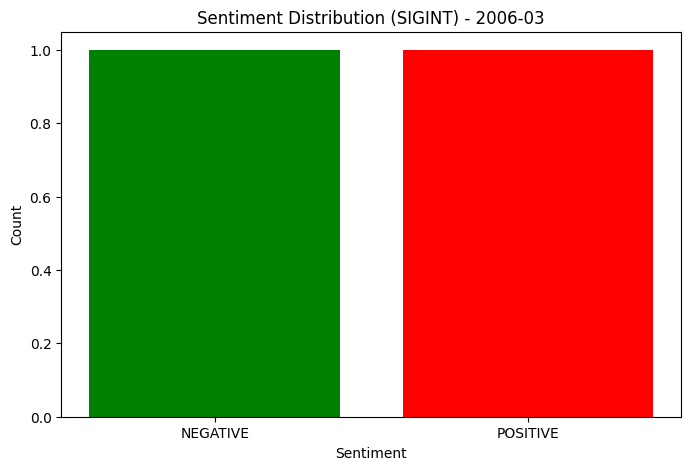

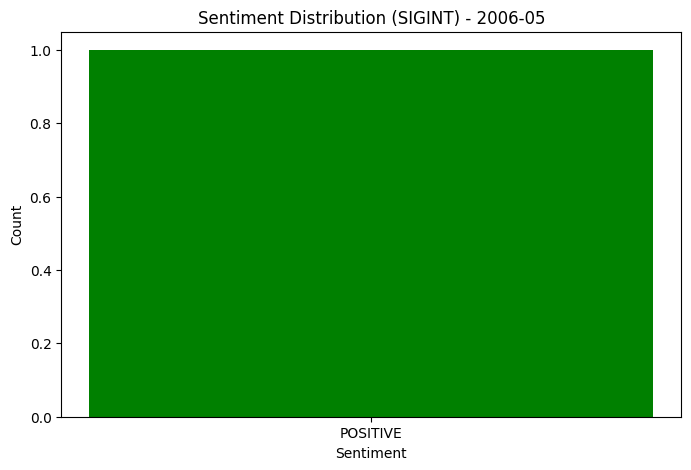

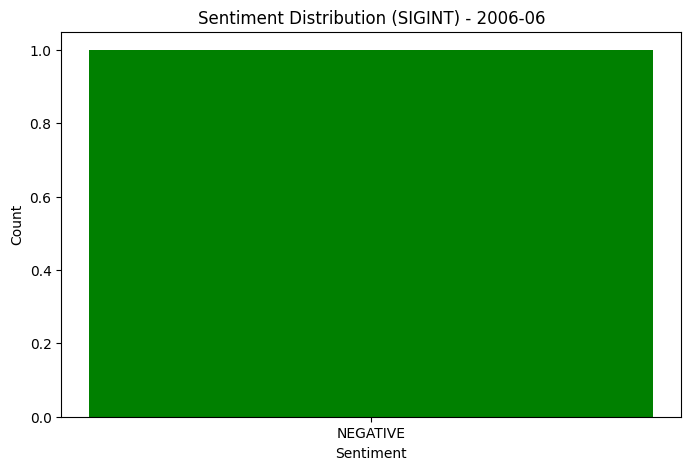

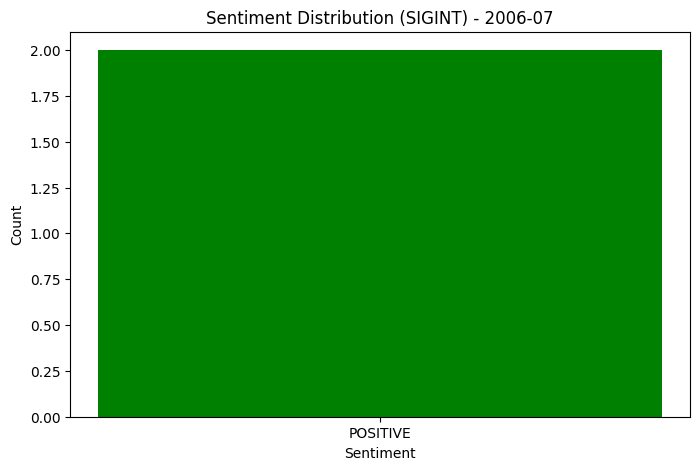

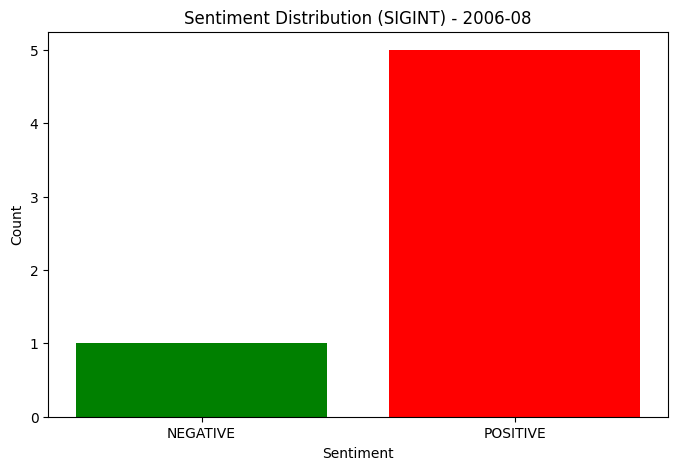

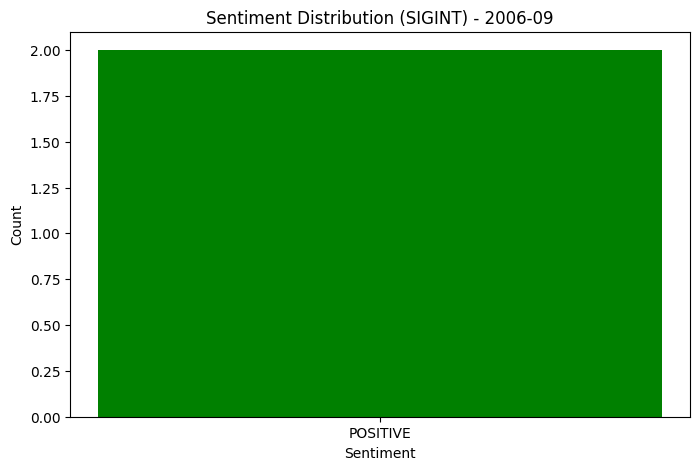

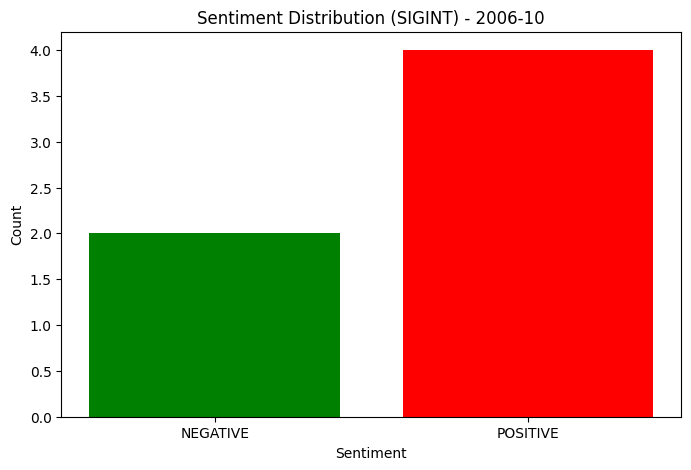

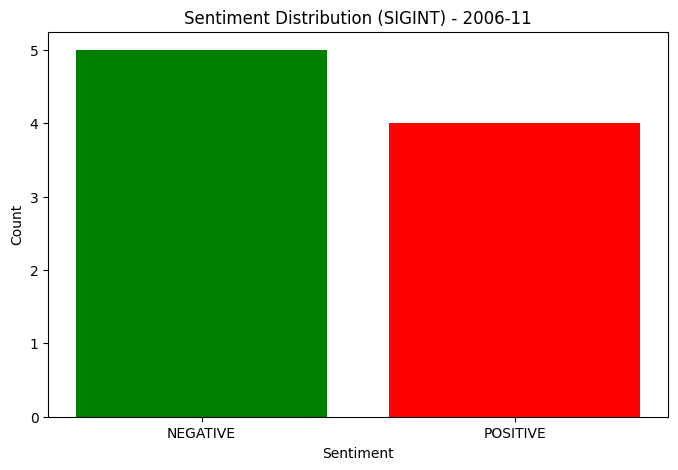

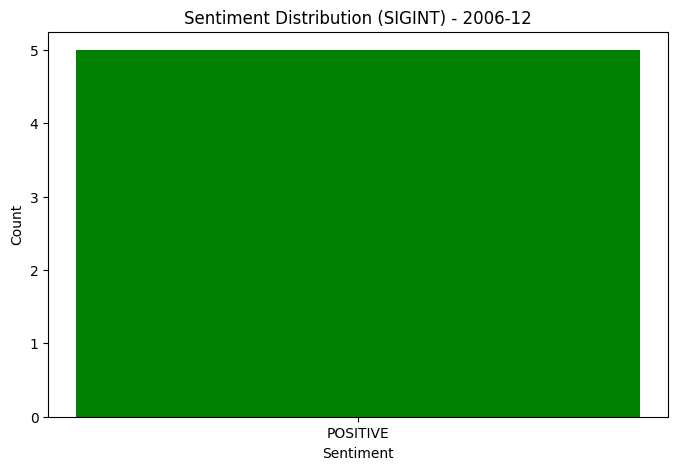

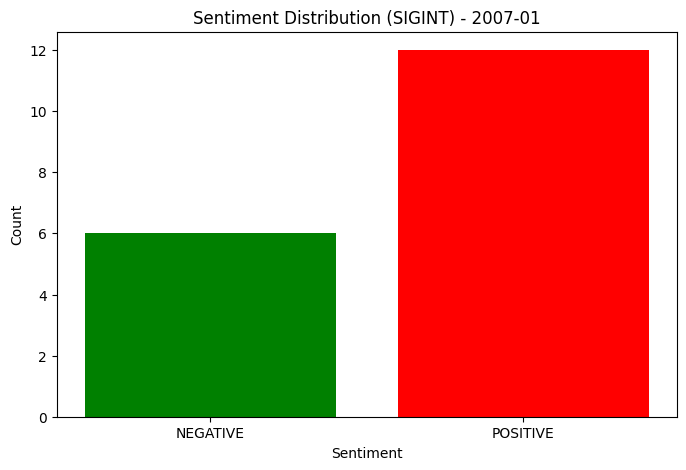

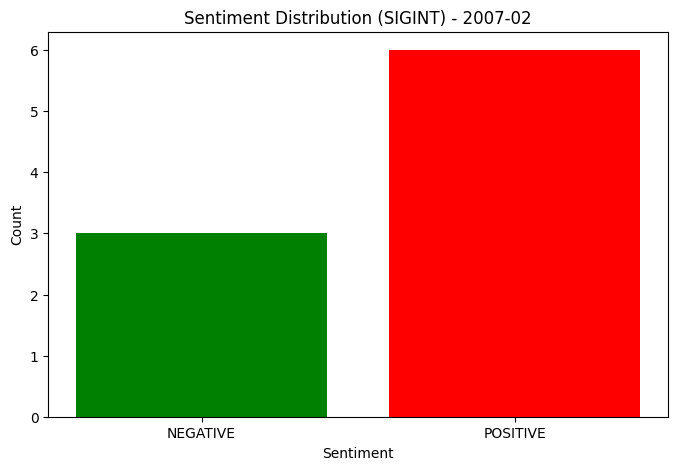

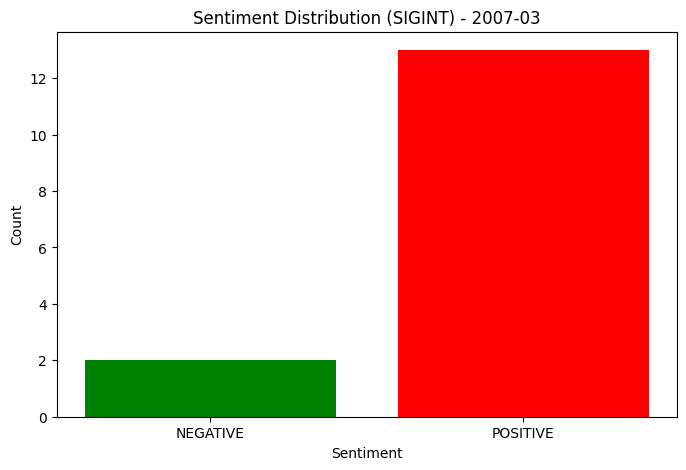

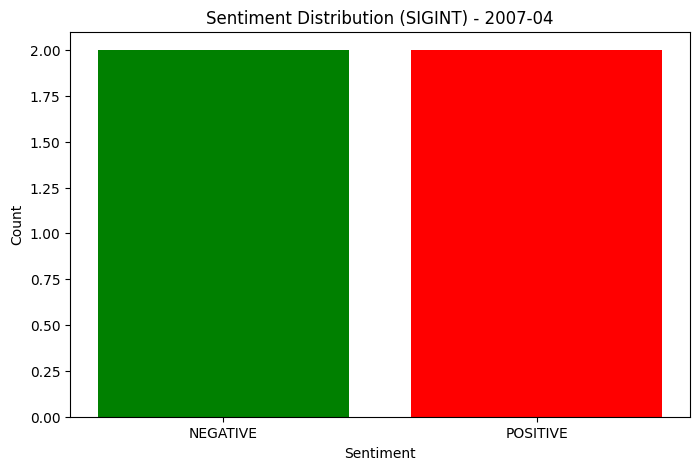

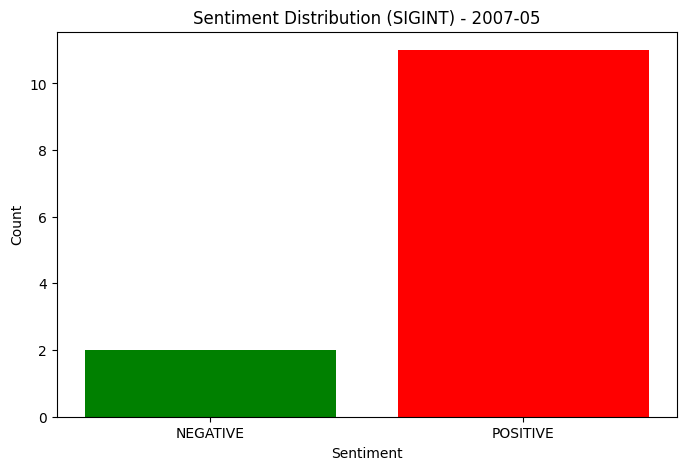

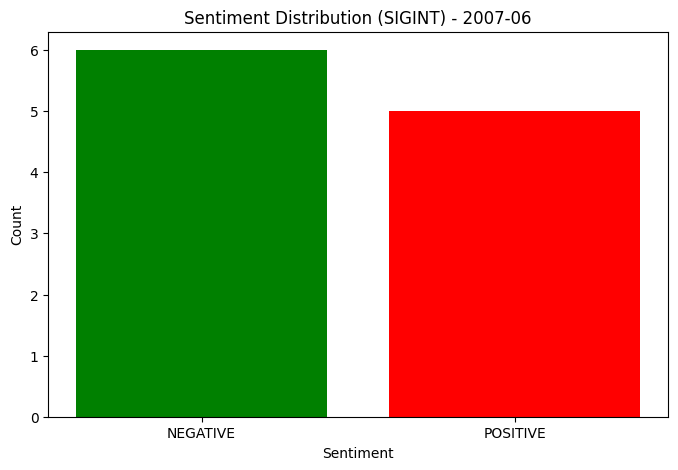

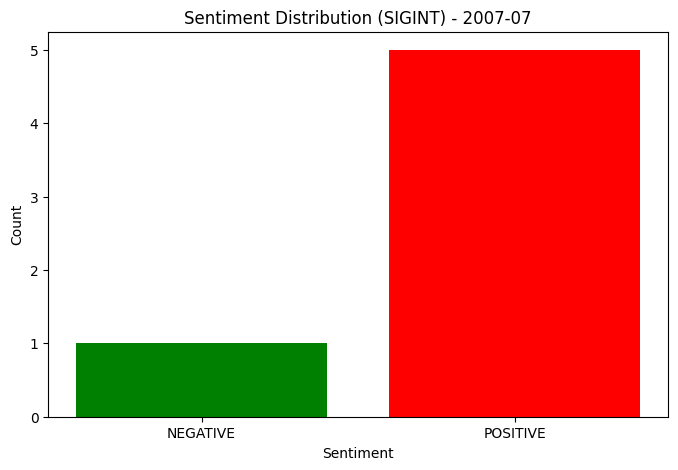

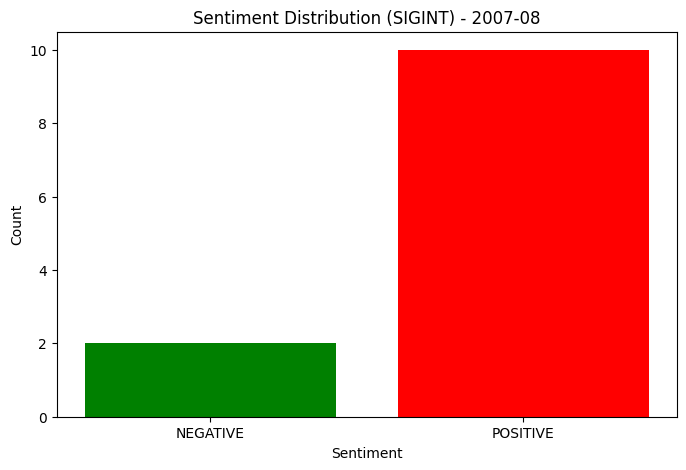

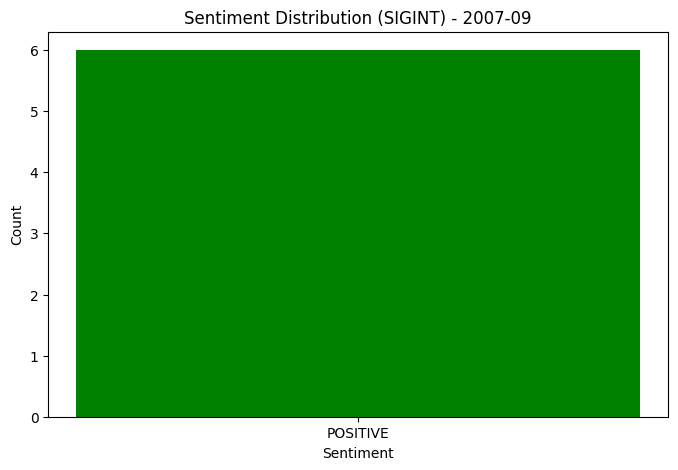

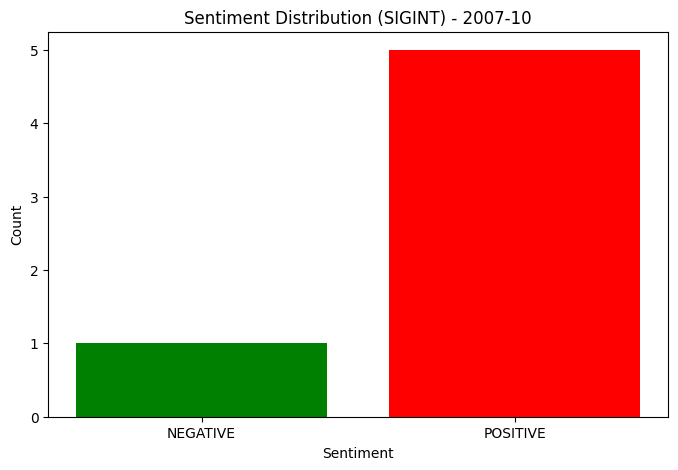

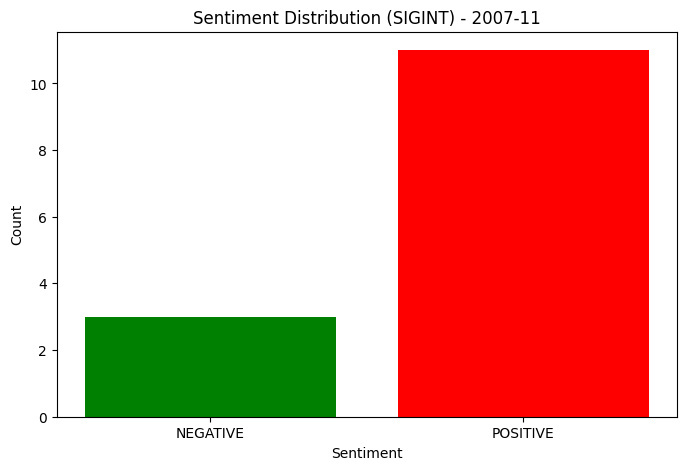

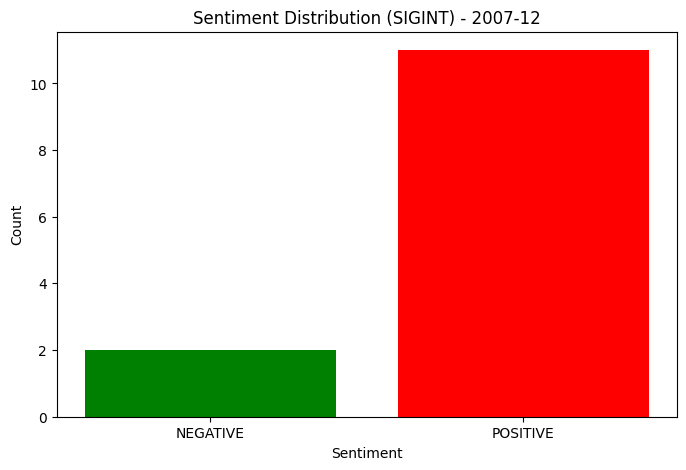

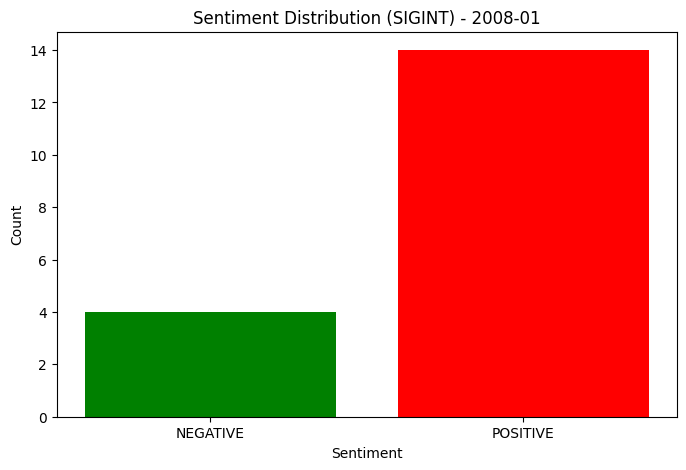

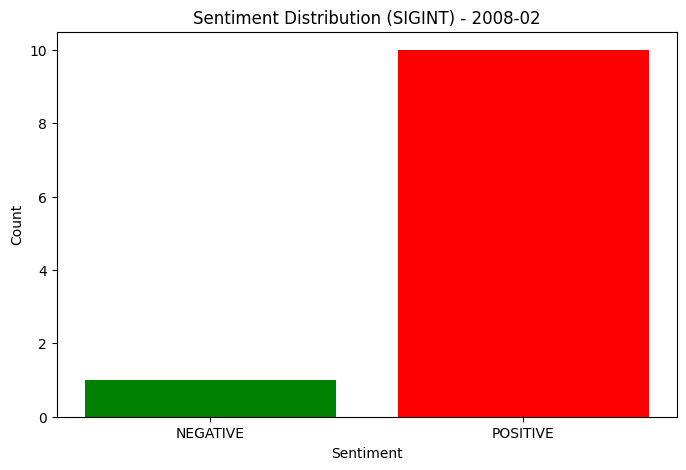

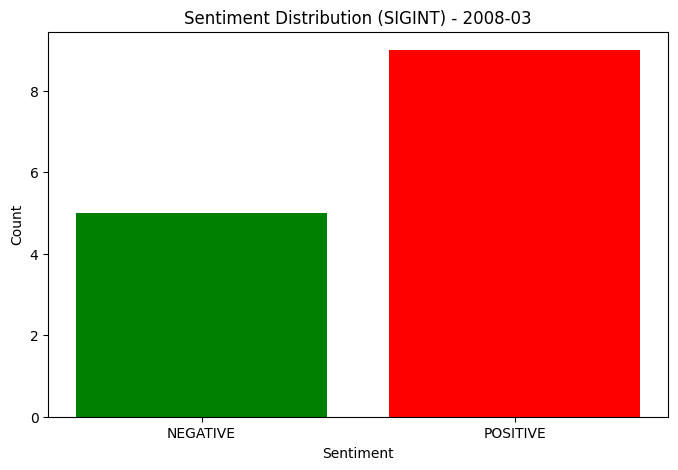

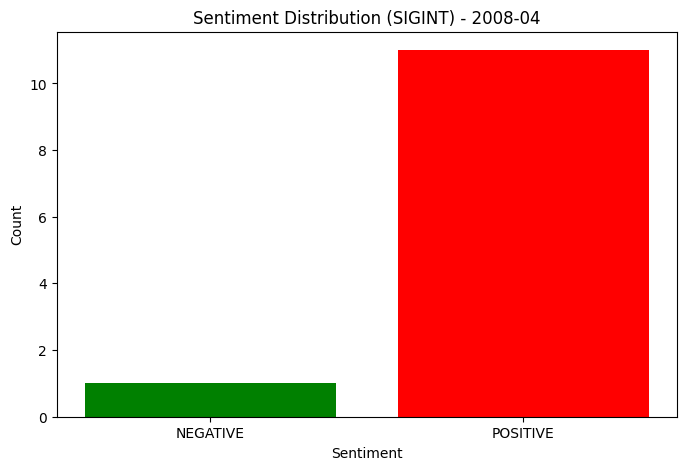

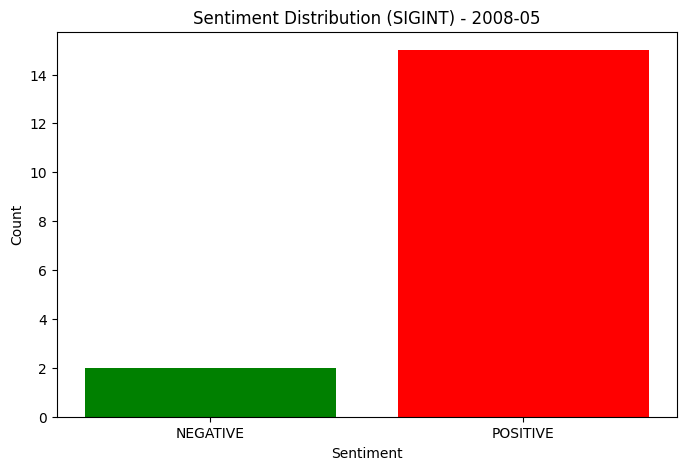

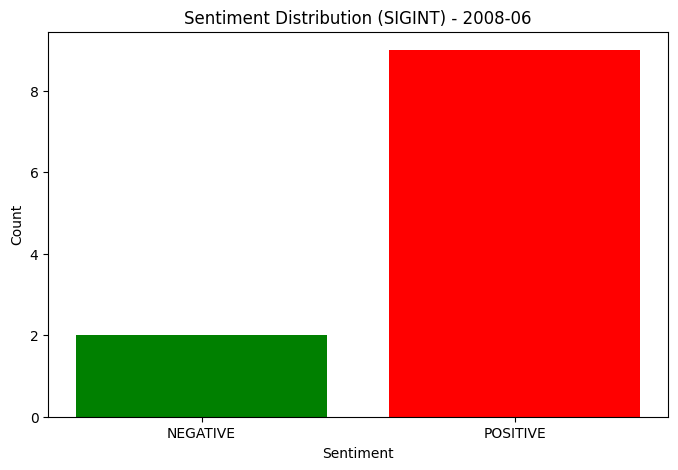

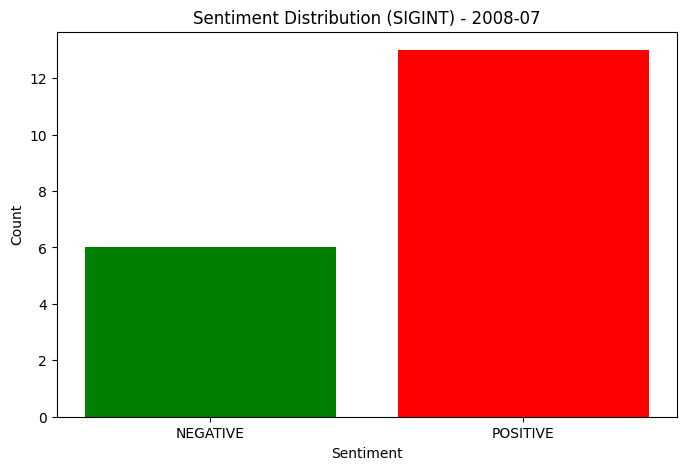

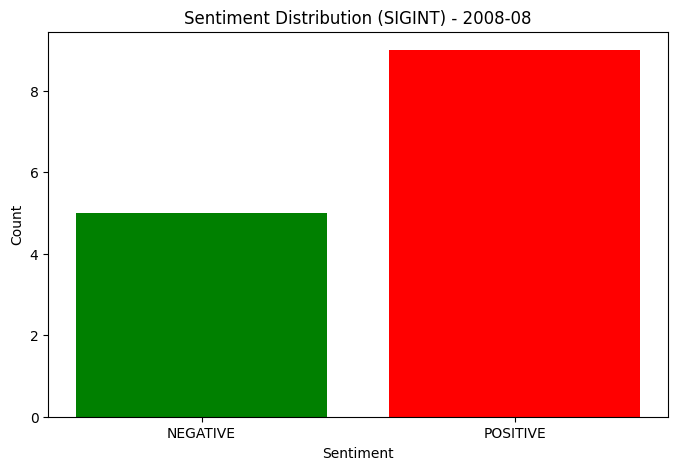

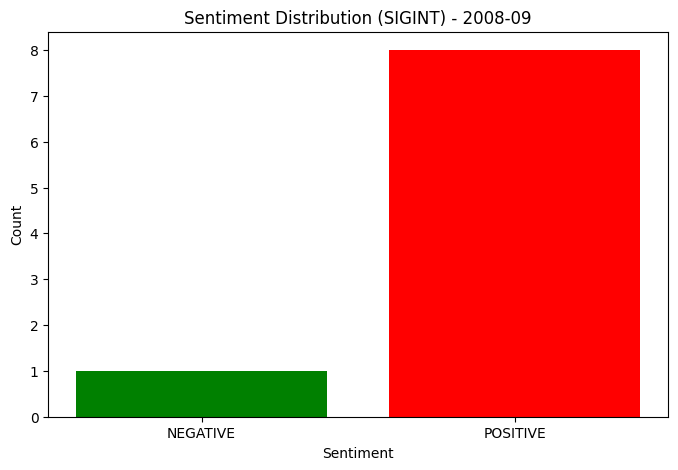

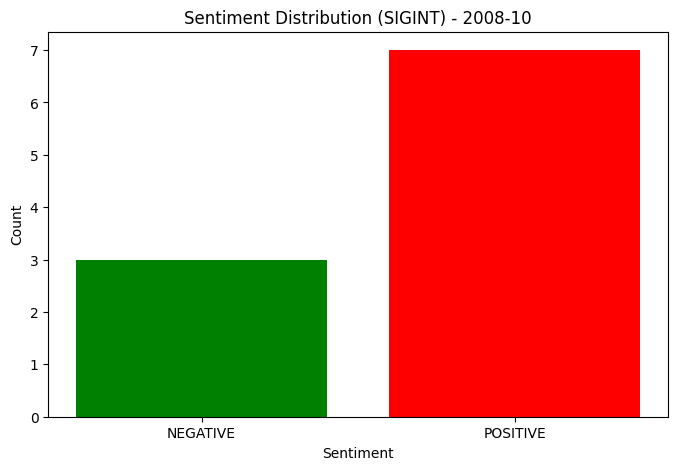

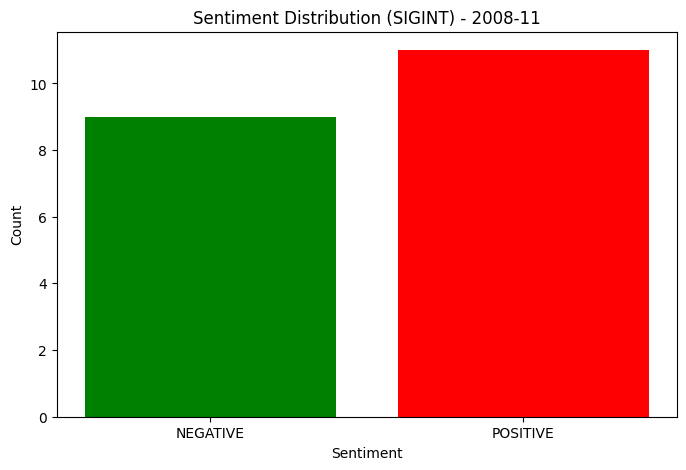

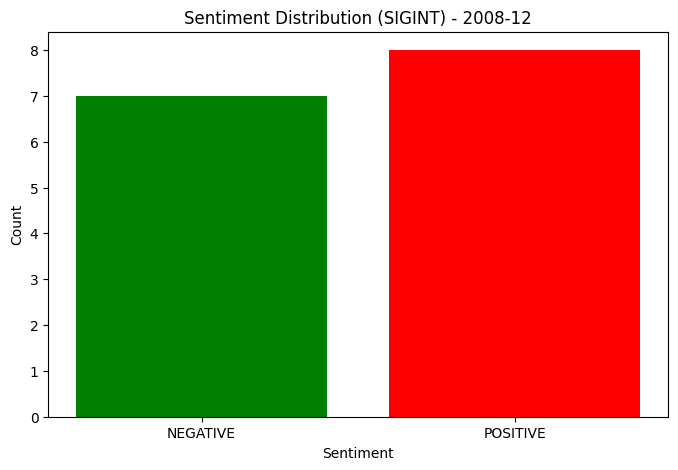

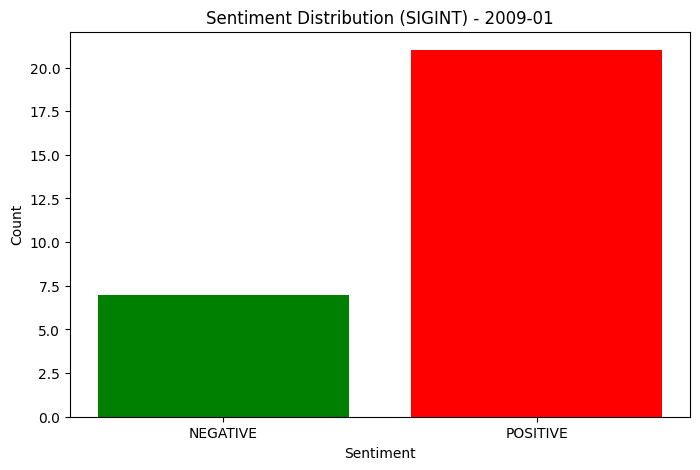

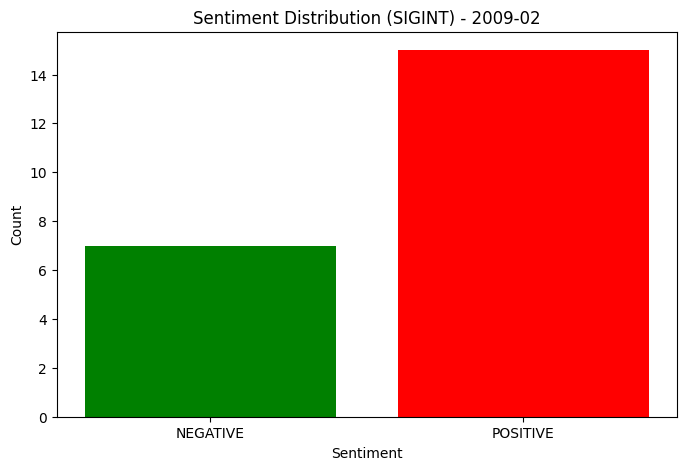

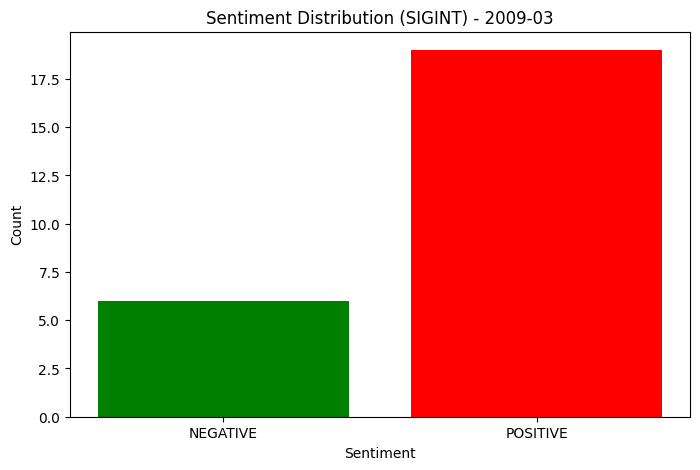

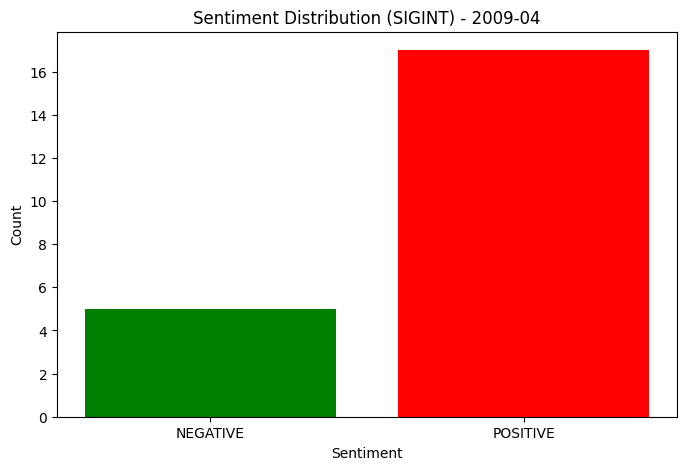

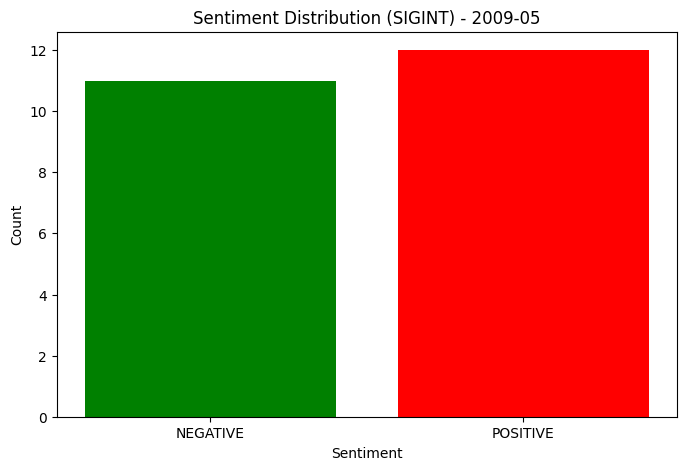

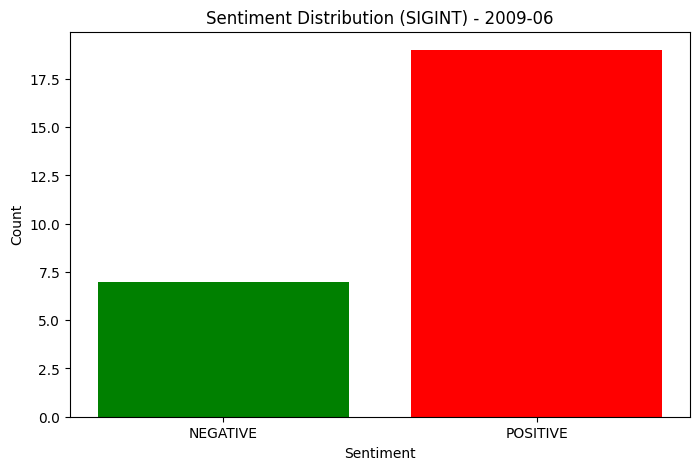

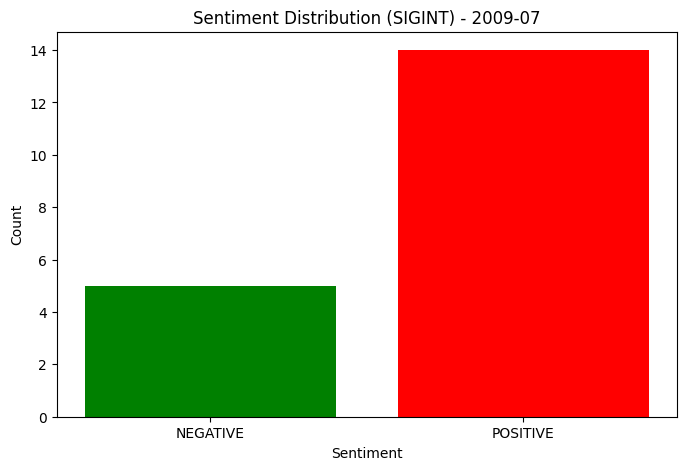

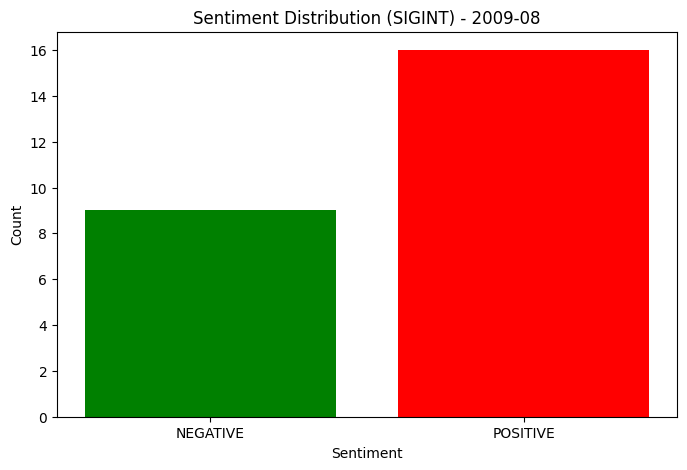

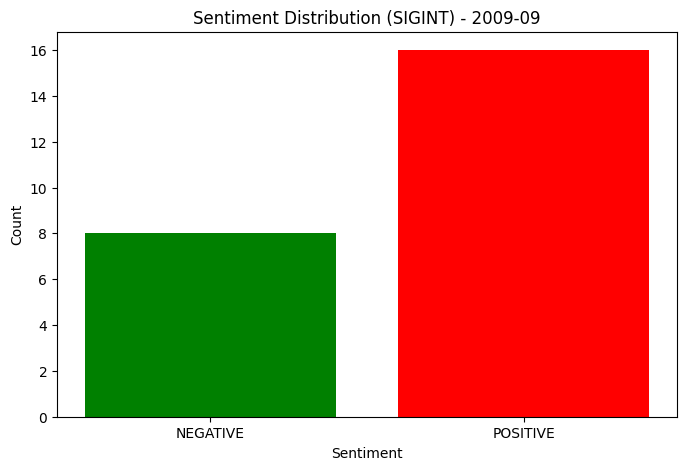

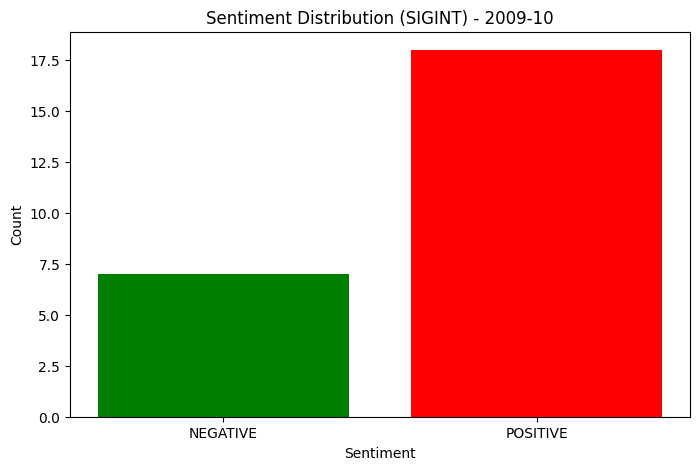

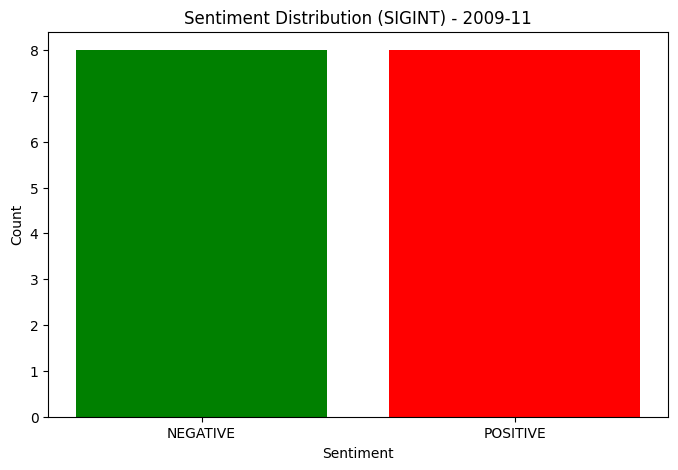

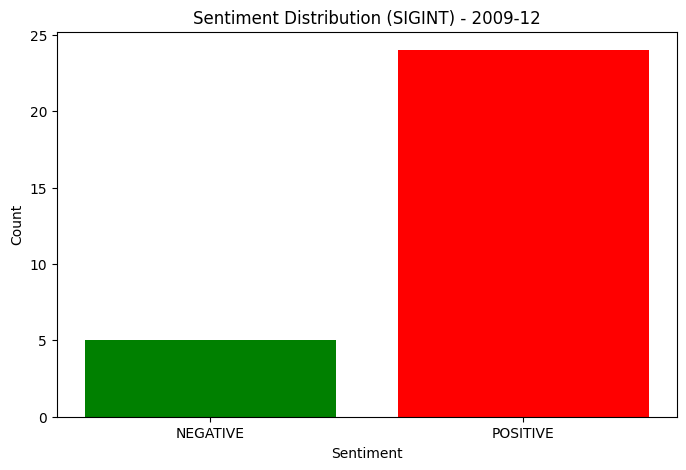

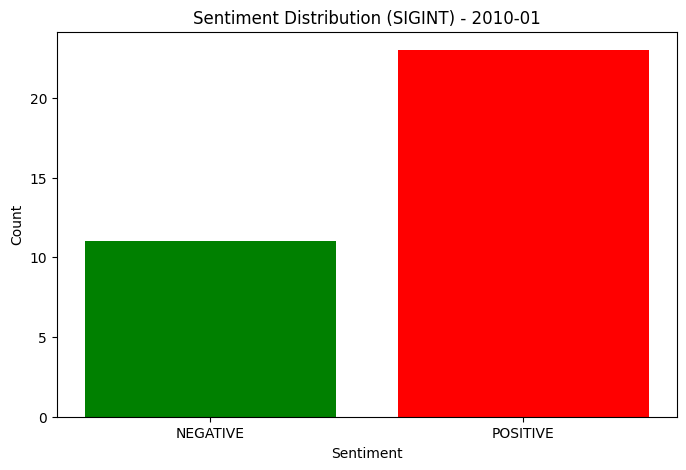

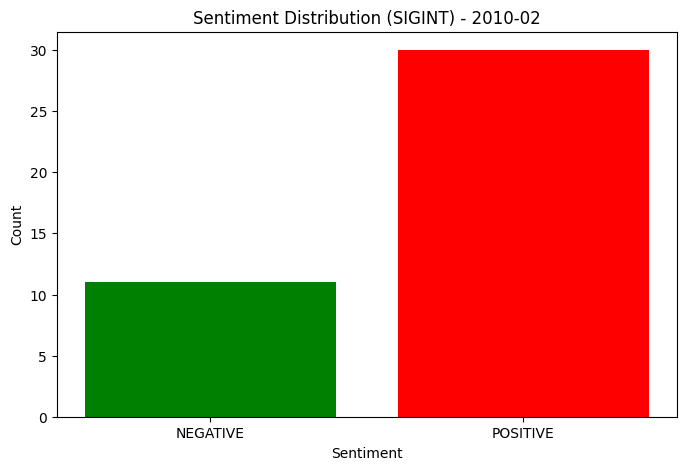

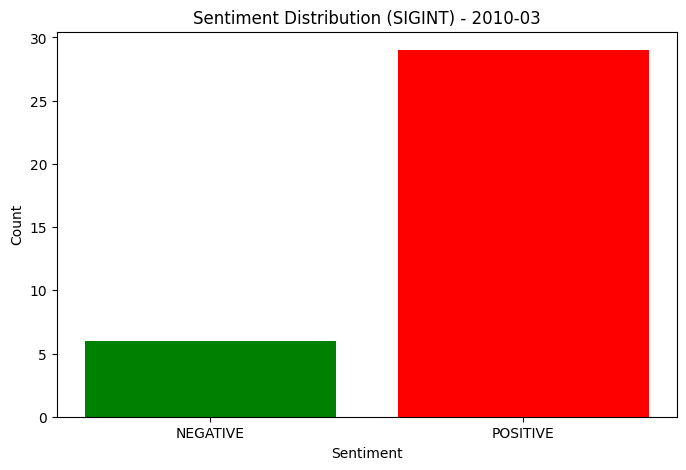

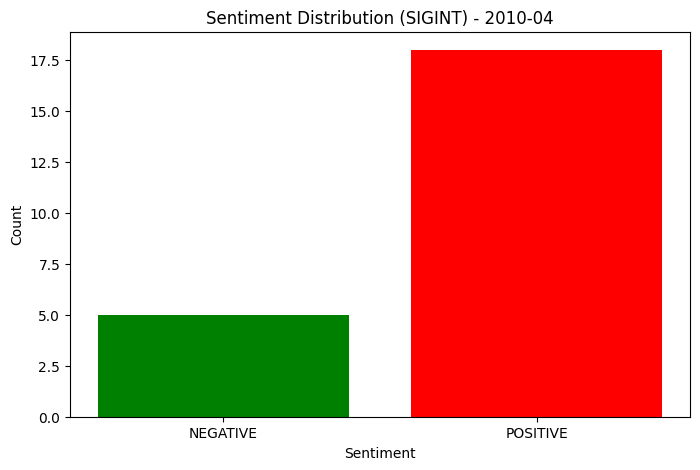

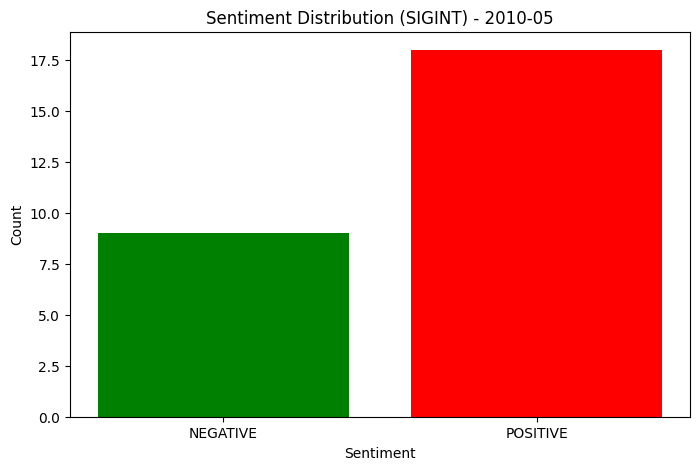

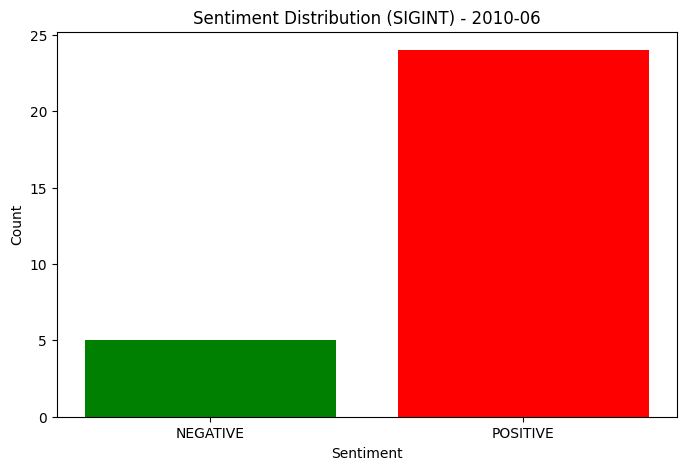

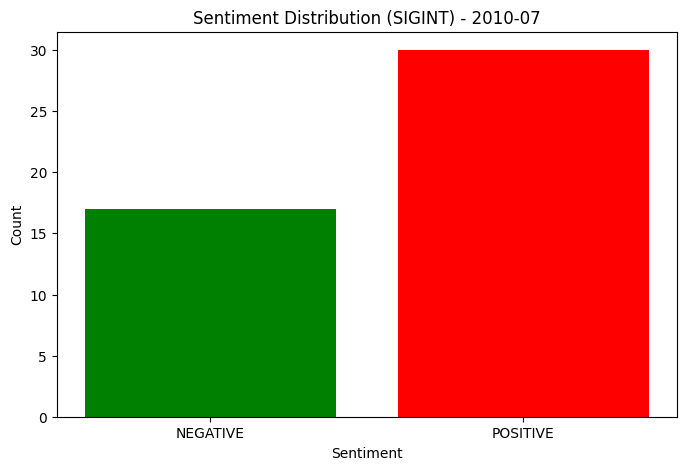

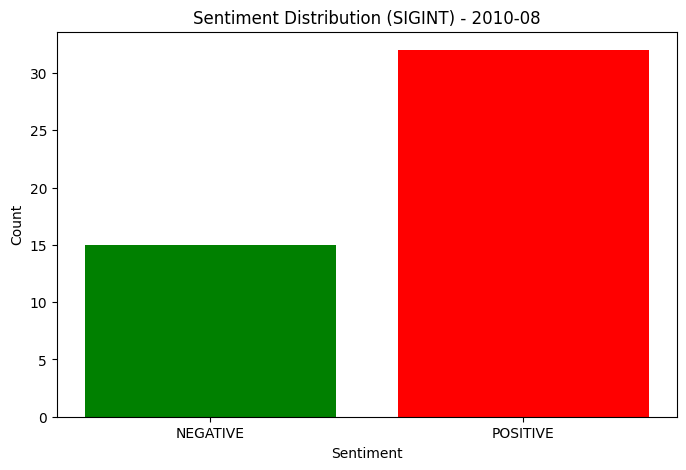

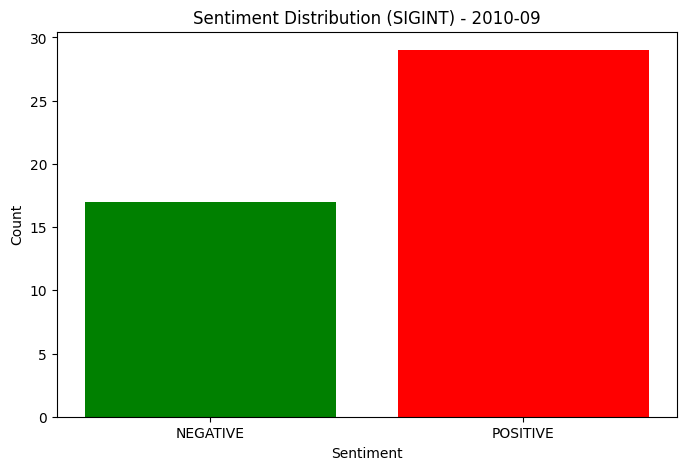

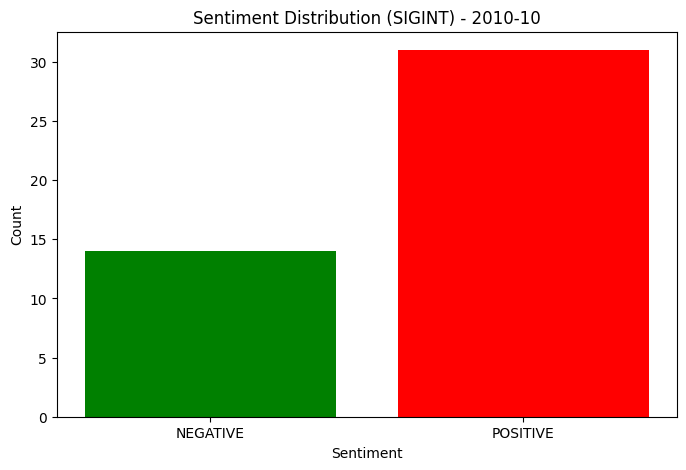

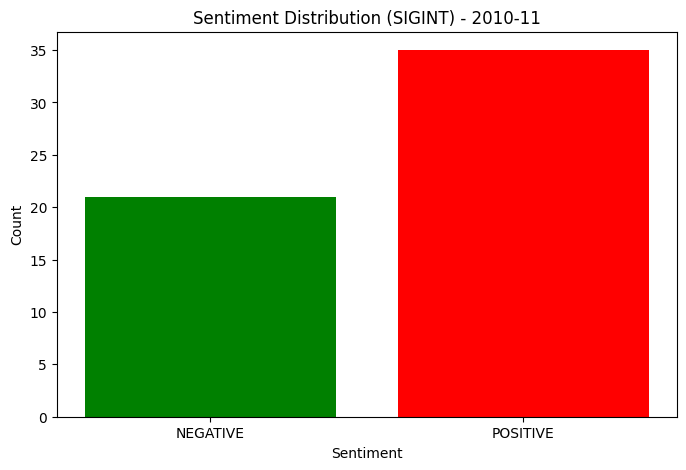

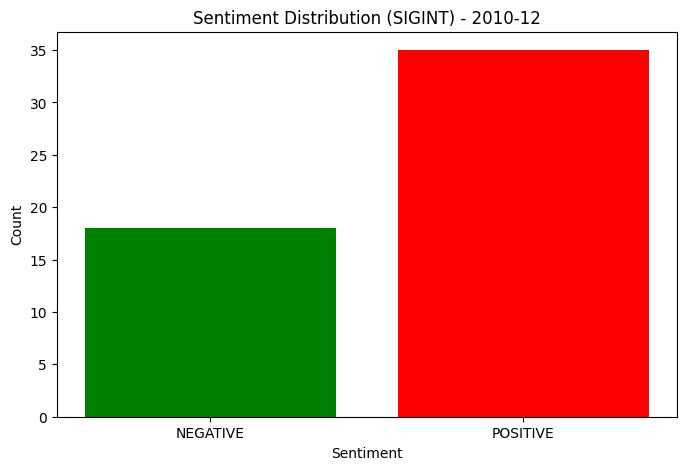

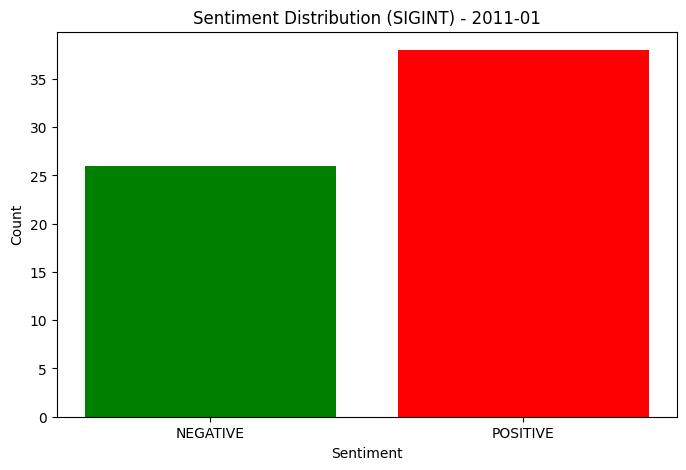

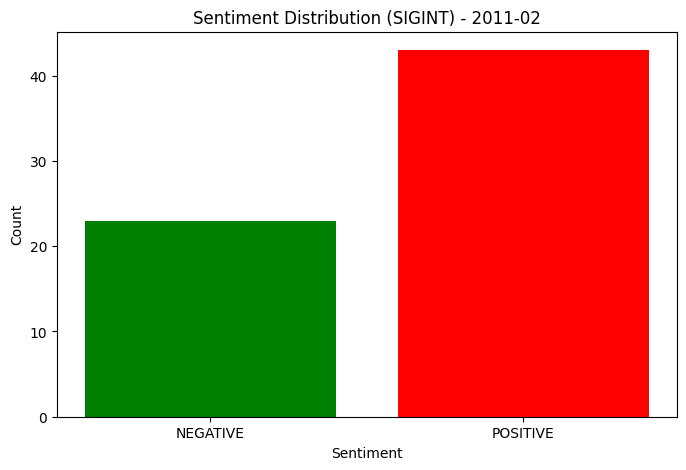

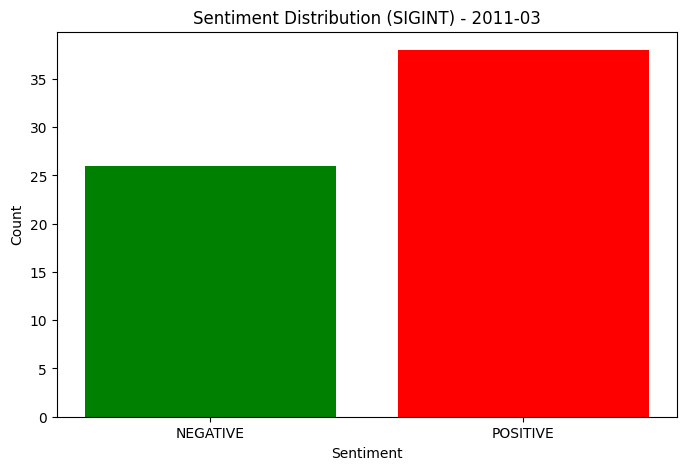

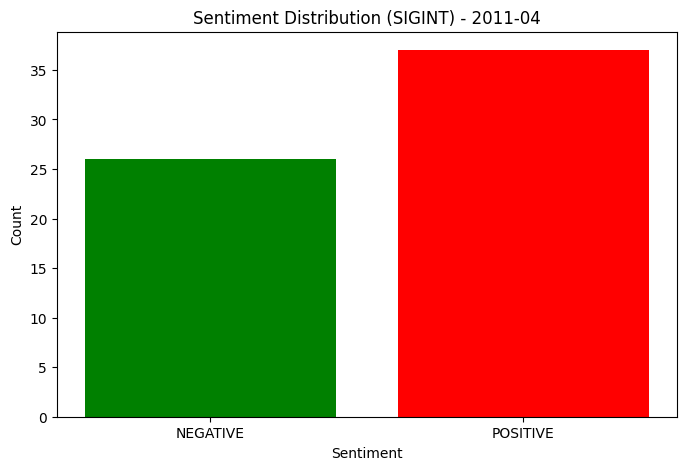

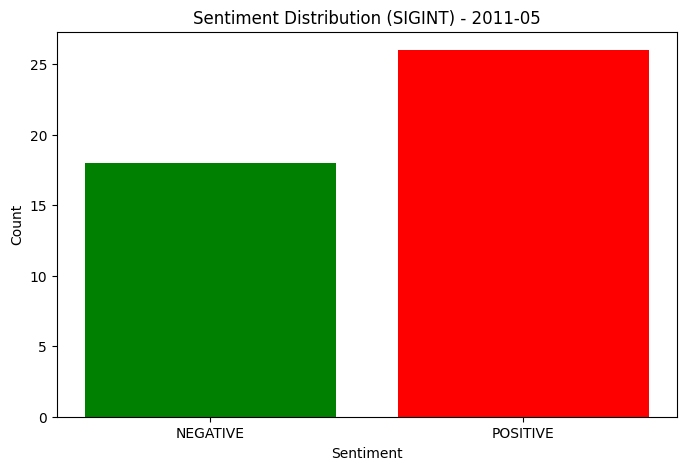

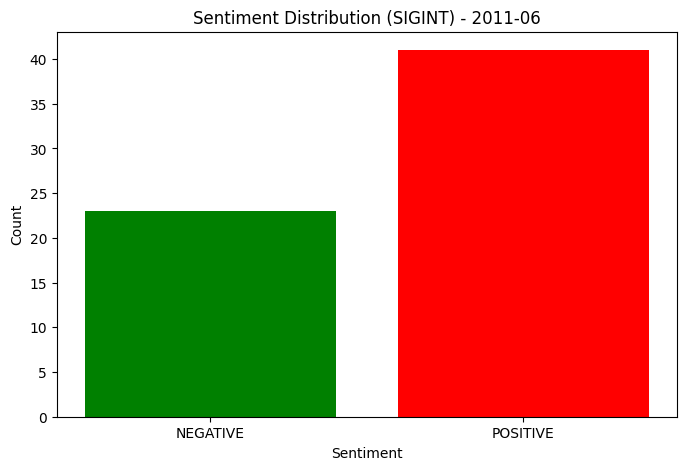

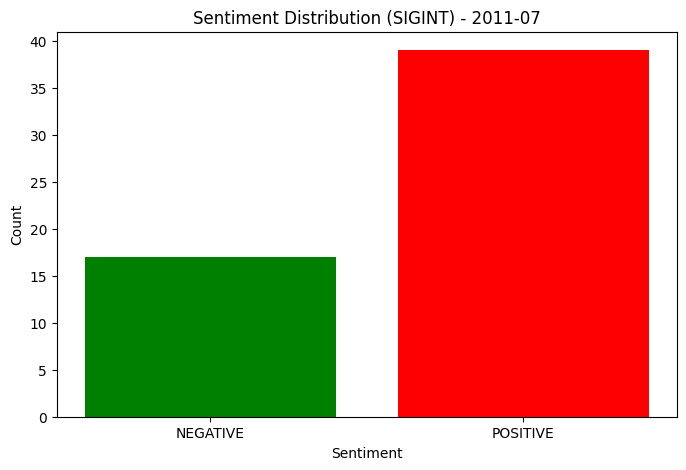

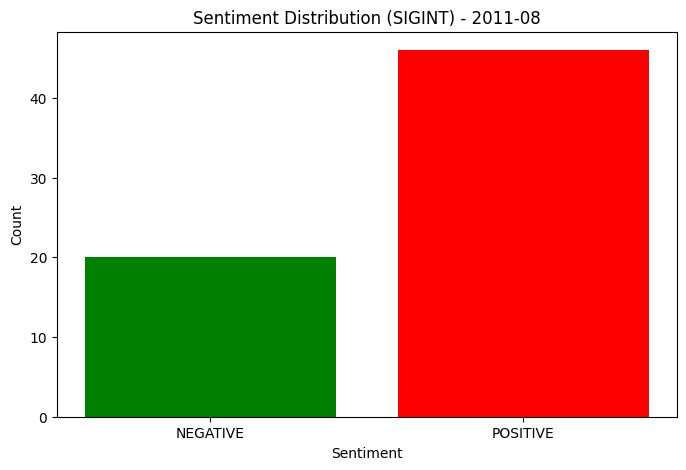

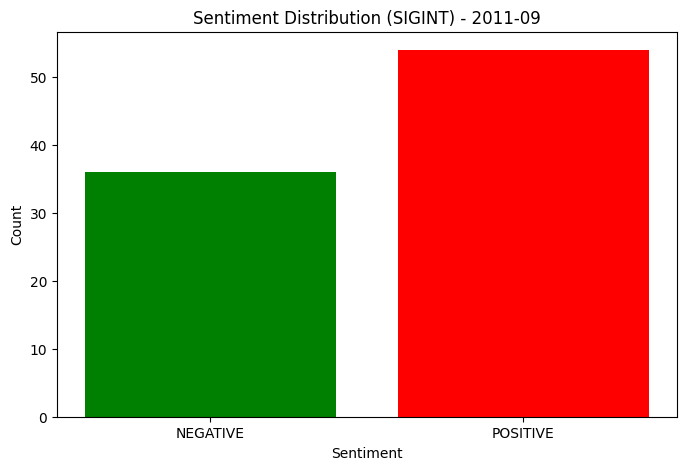

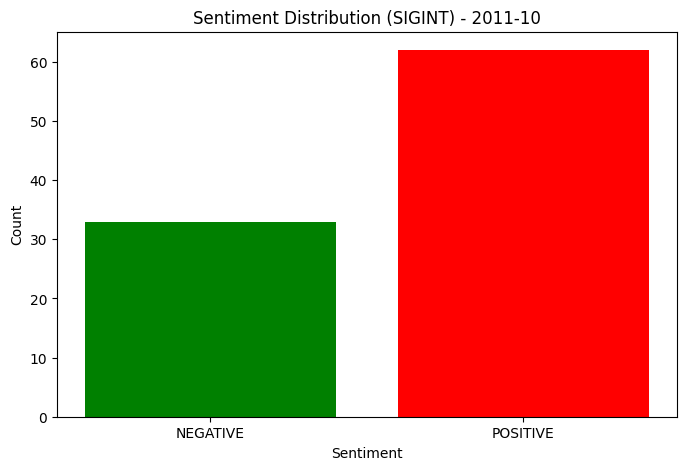

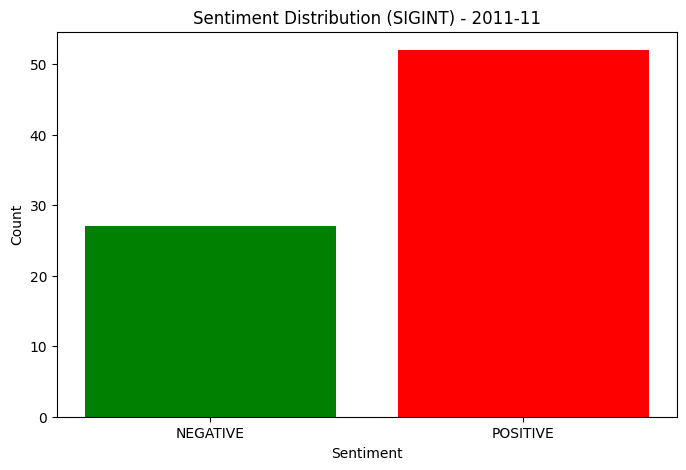

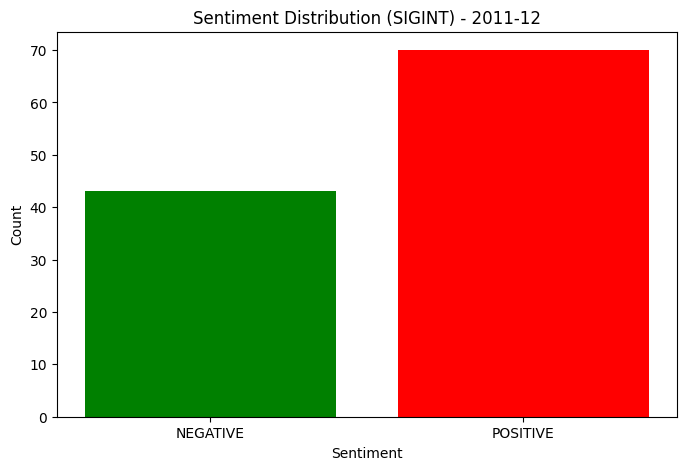

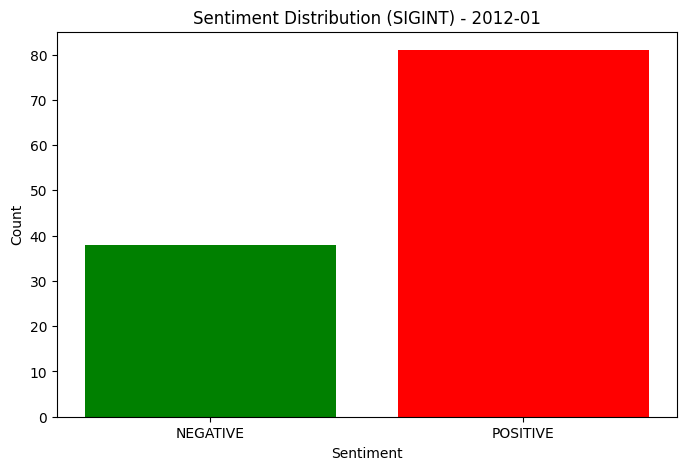

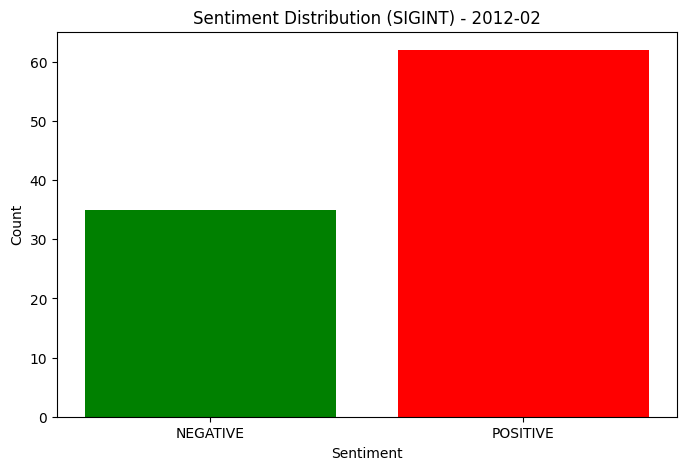

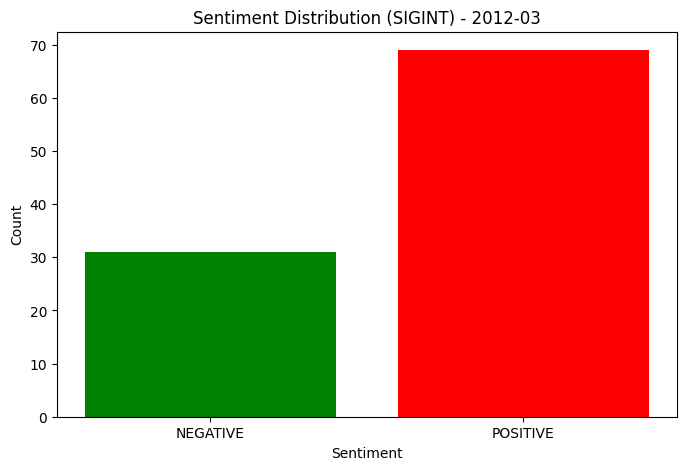

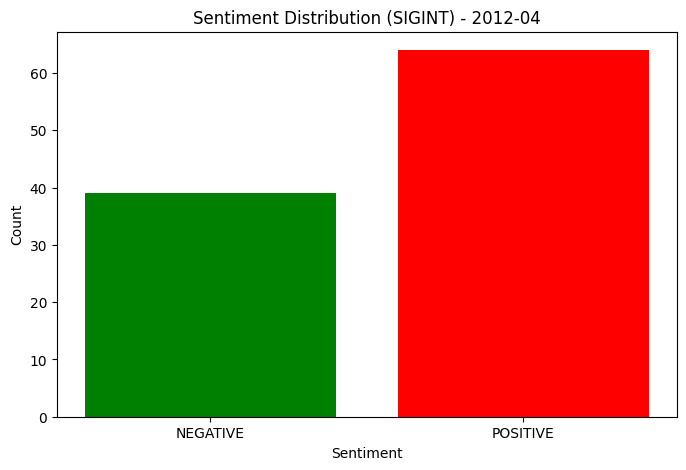

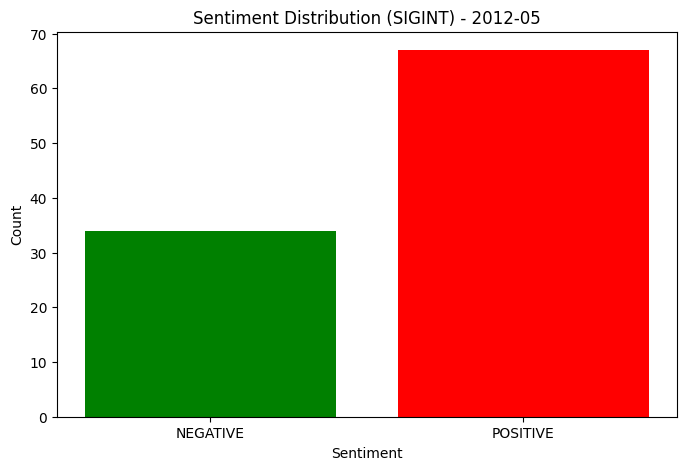

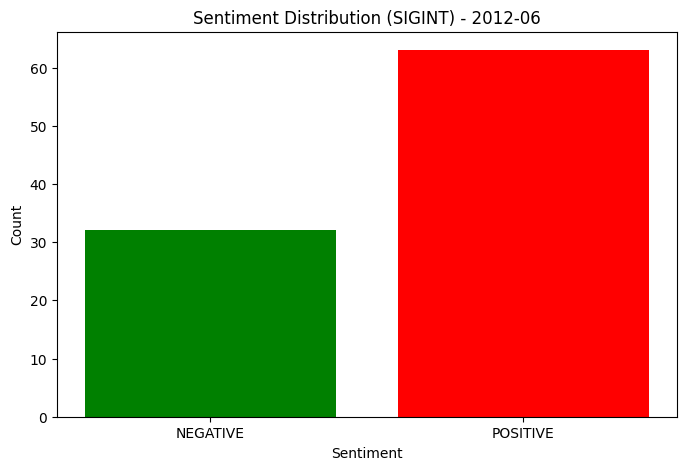

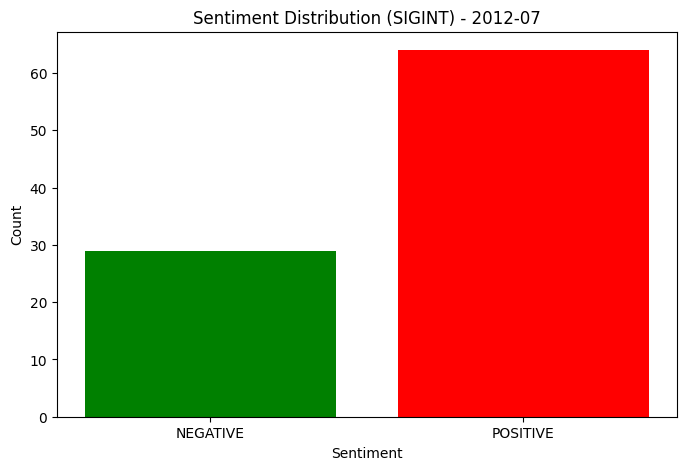

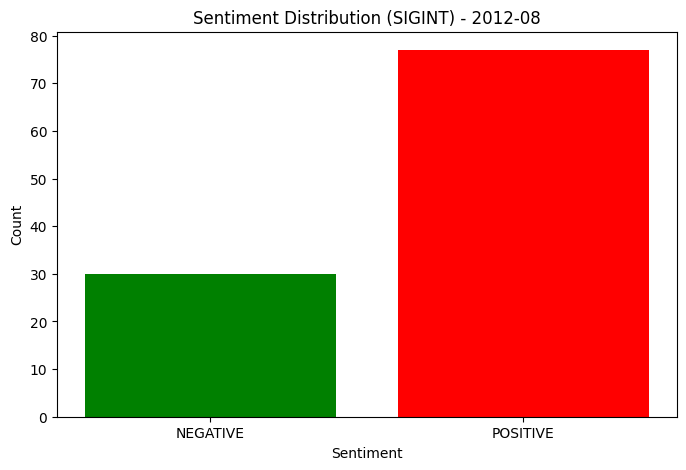

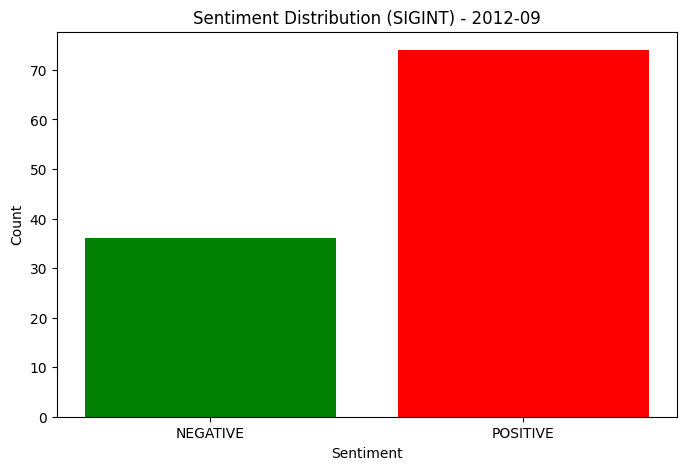

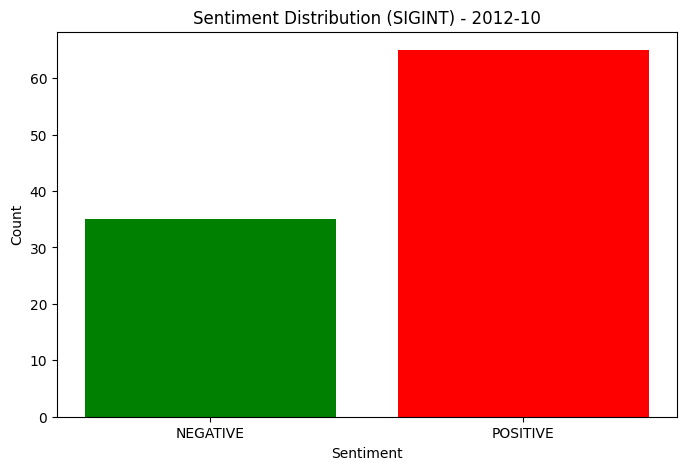

In [27]:
# 8. Visualisasi SIGINT Sentiment per Bulan
for month in sigint_summary['Month'].unique():
    filtered = sigint_summary[sigint_summary['Month'] == month]
    plt.figure(figsize=(8,5))
    plt.bar(filtered['Sentiment'], filtered['Count'], color=['green', 'red'])
    plt.title(f'Sentiment Distribution (SIGINT) - {month}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

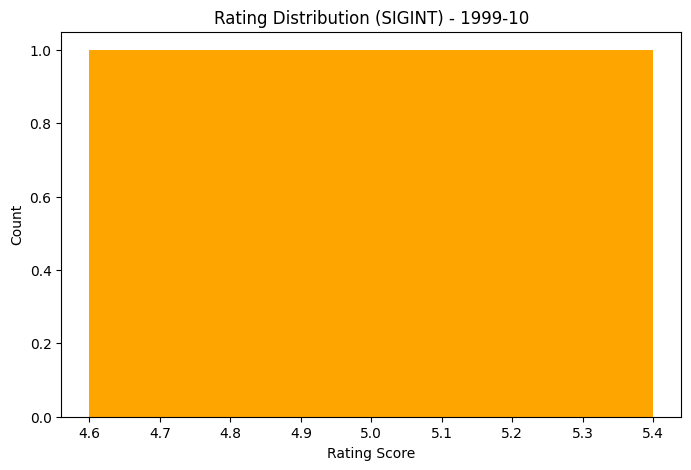

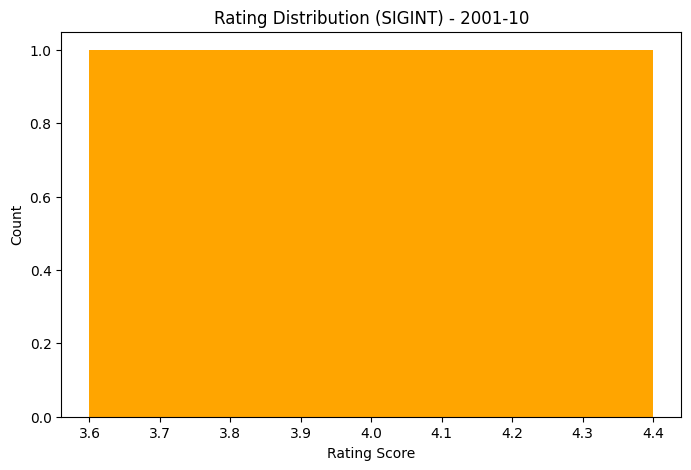

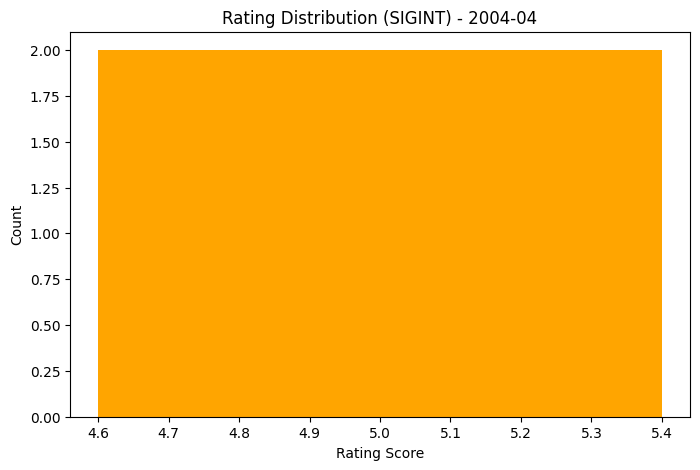

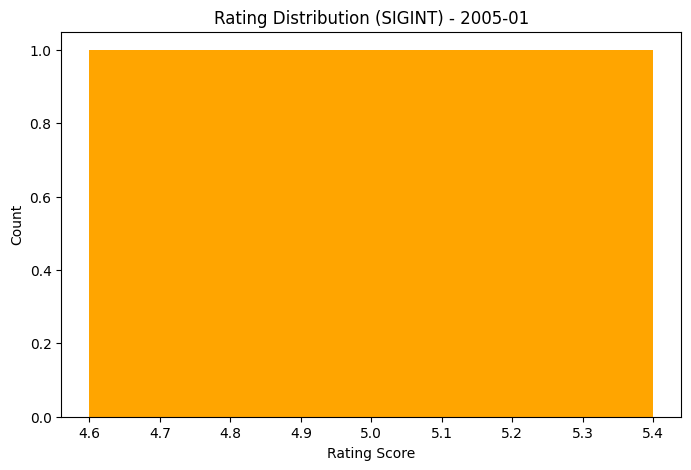

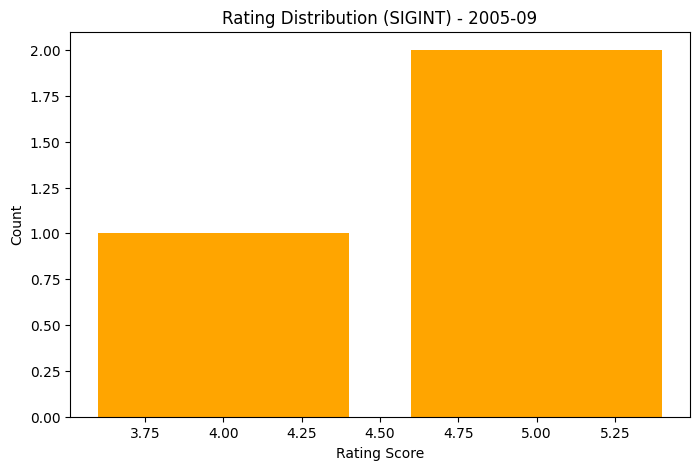

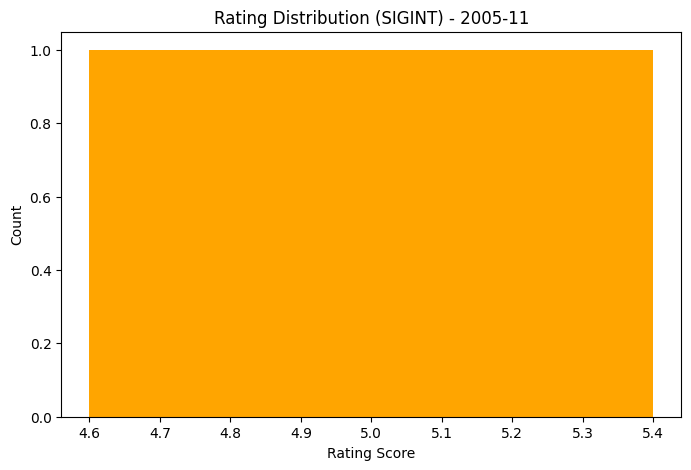

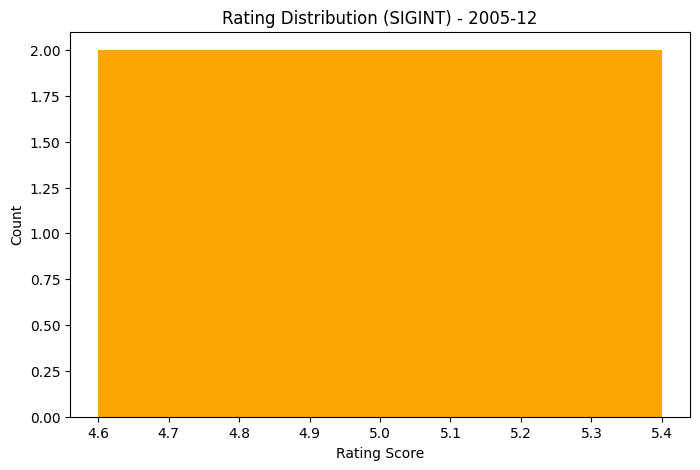

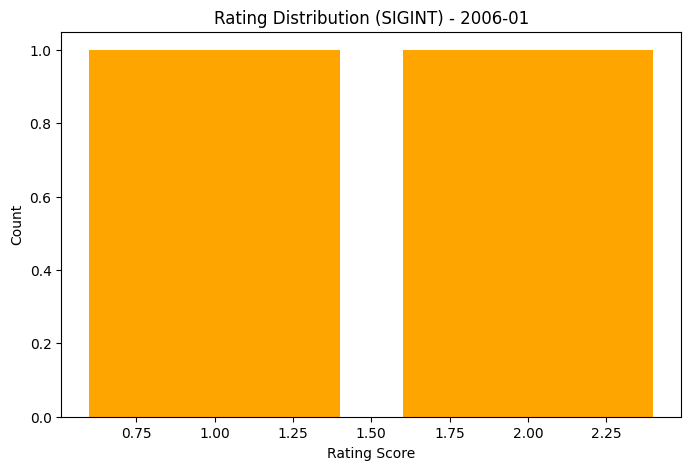

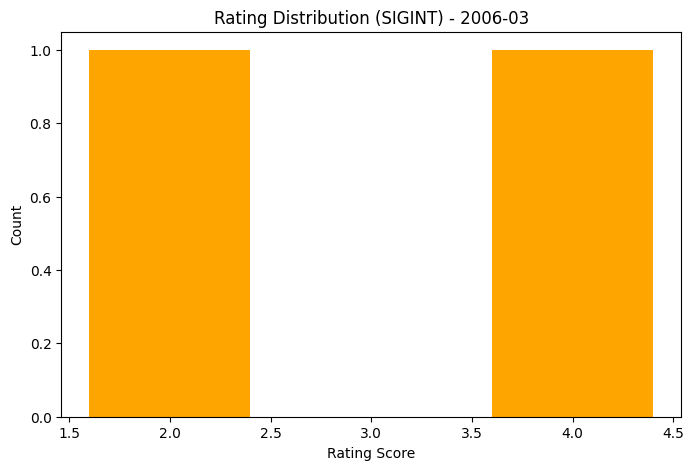

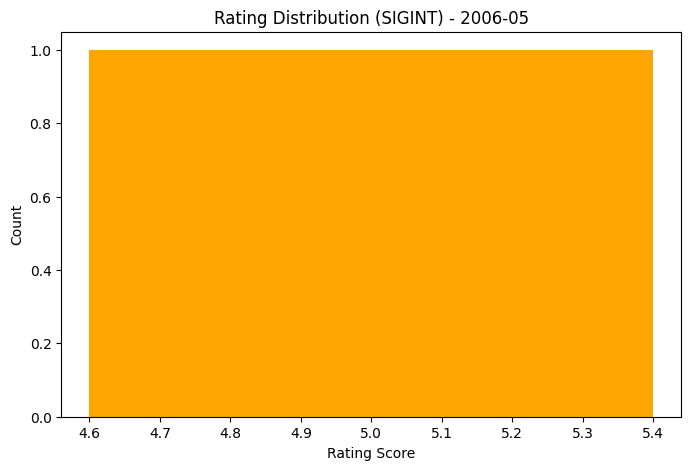

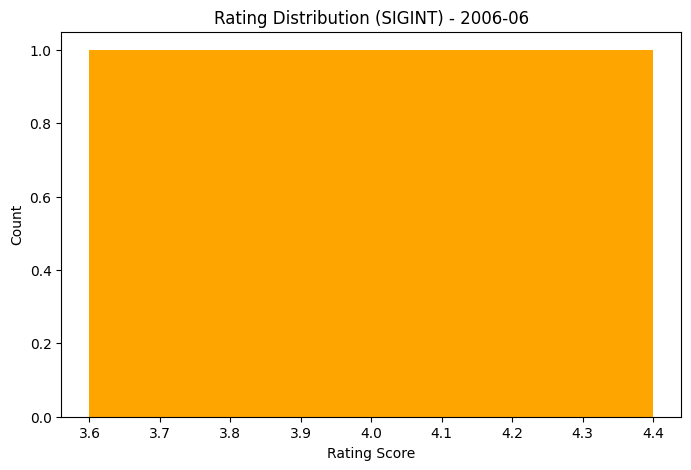

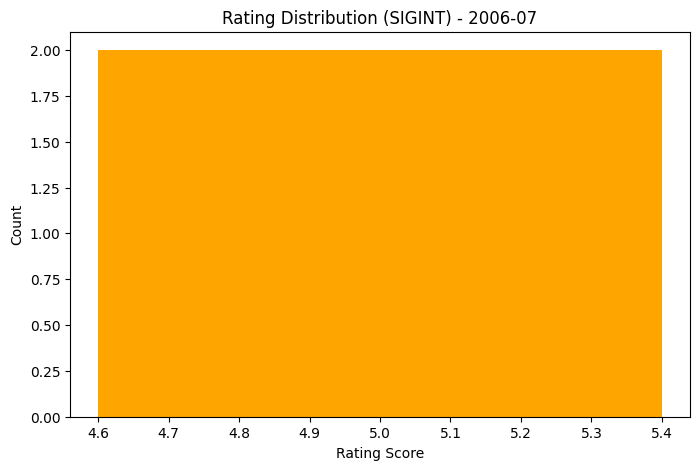

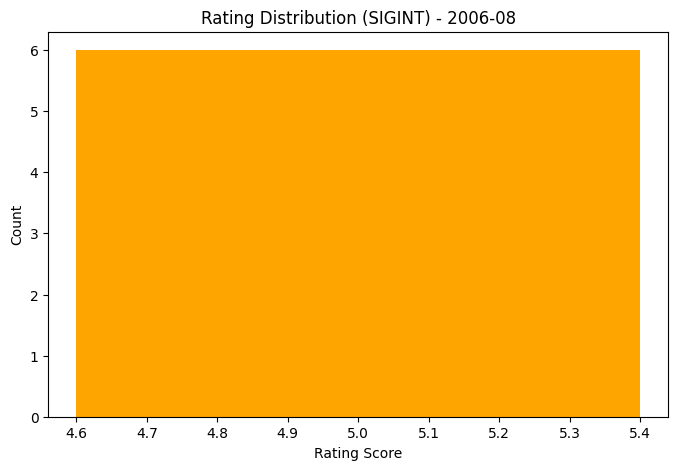

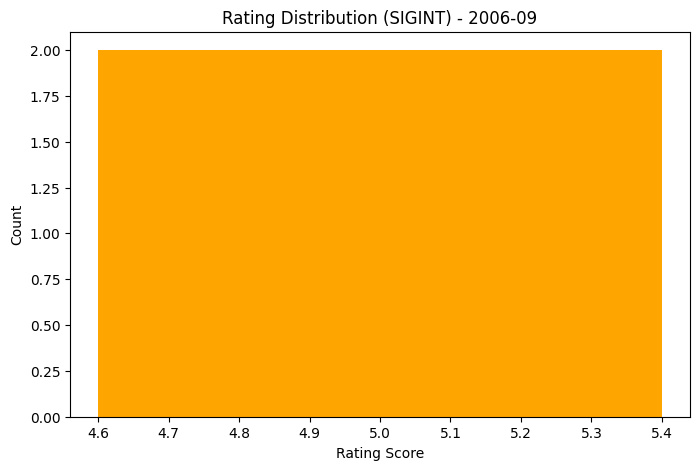

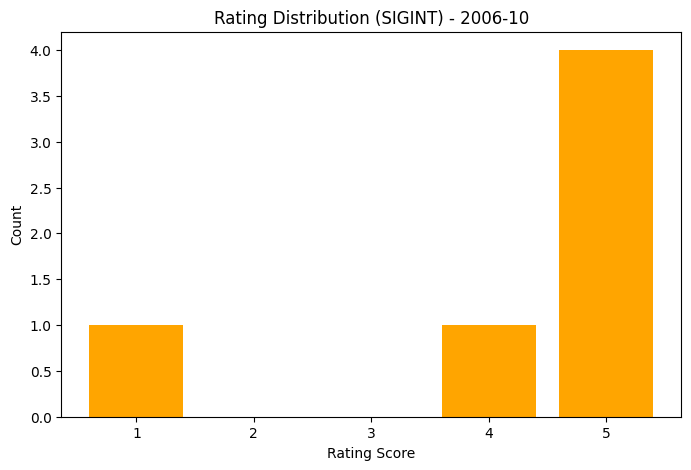

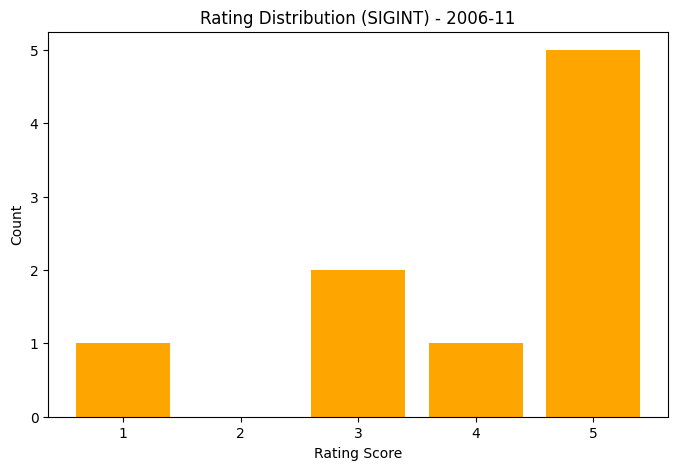

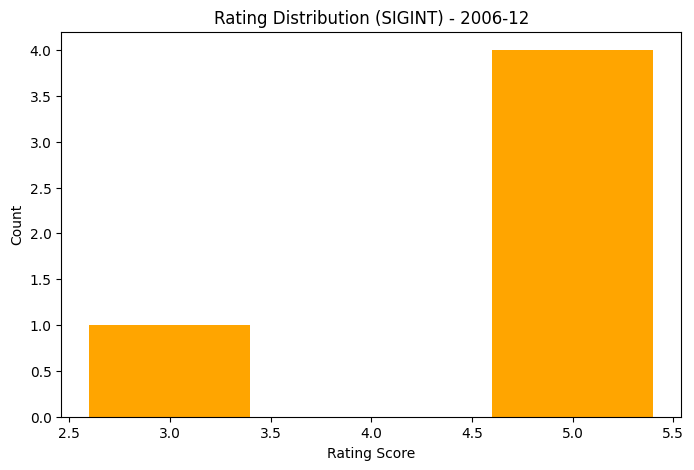

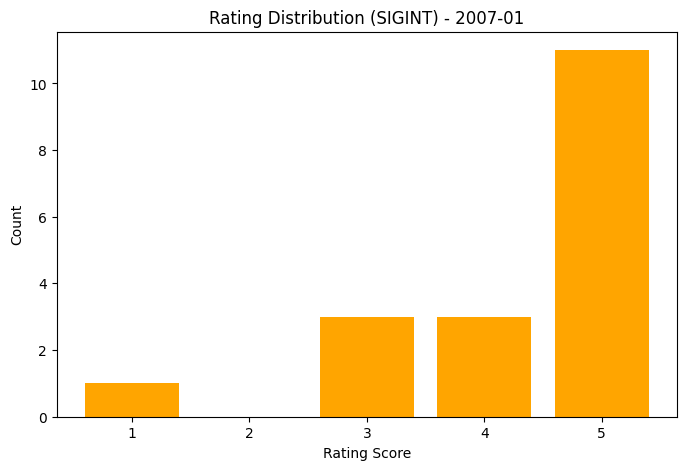

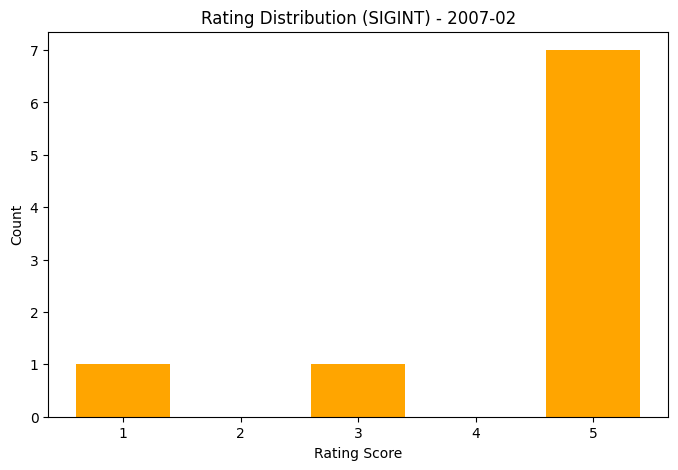

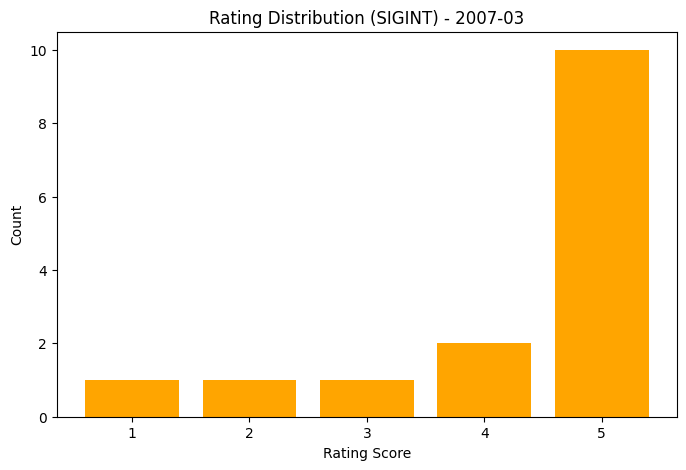

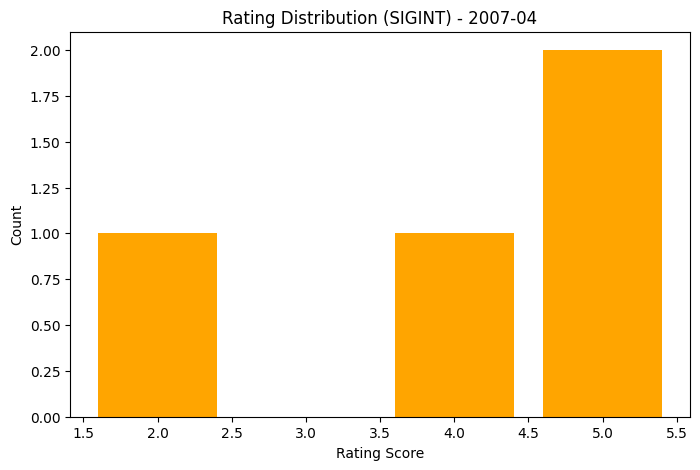

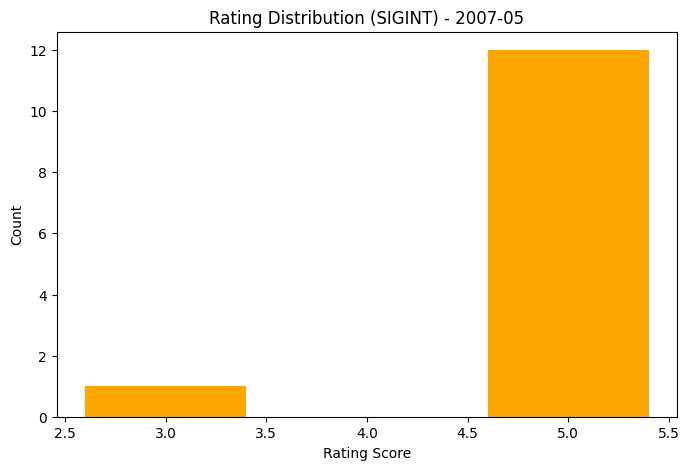

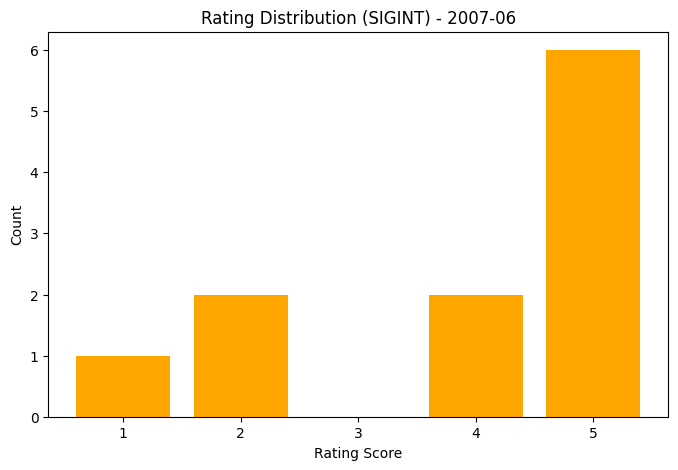

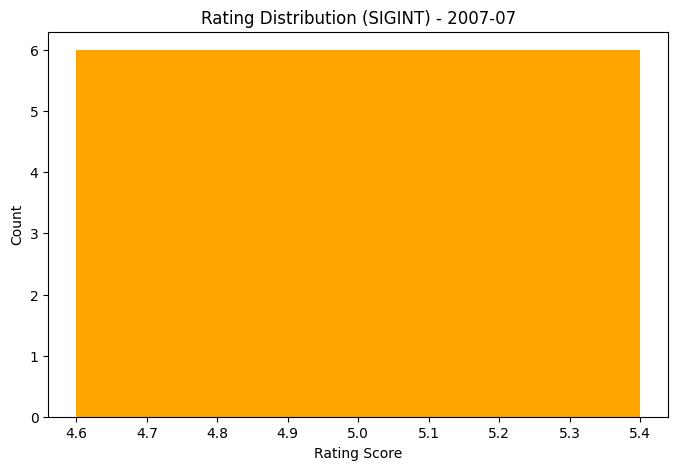

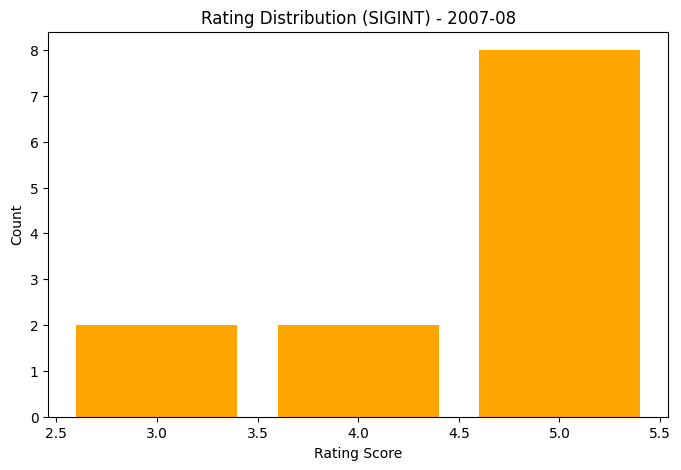

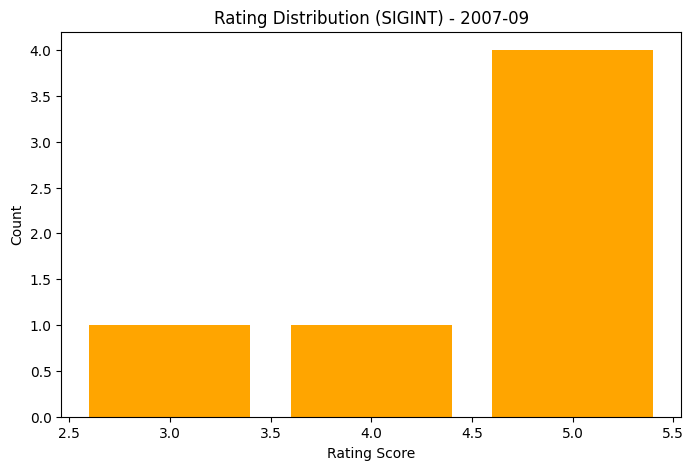

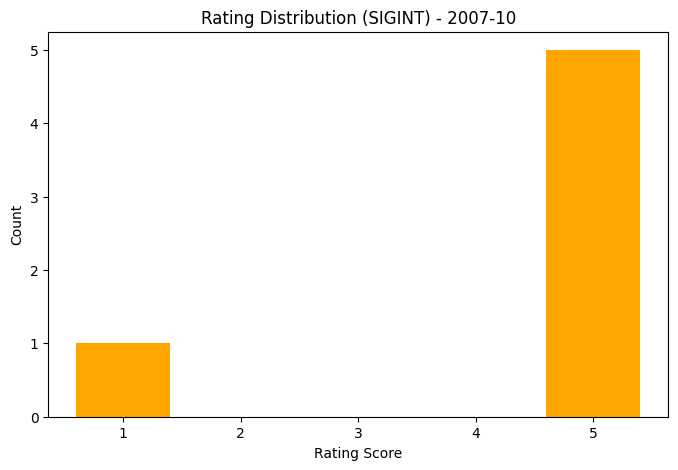

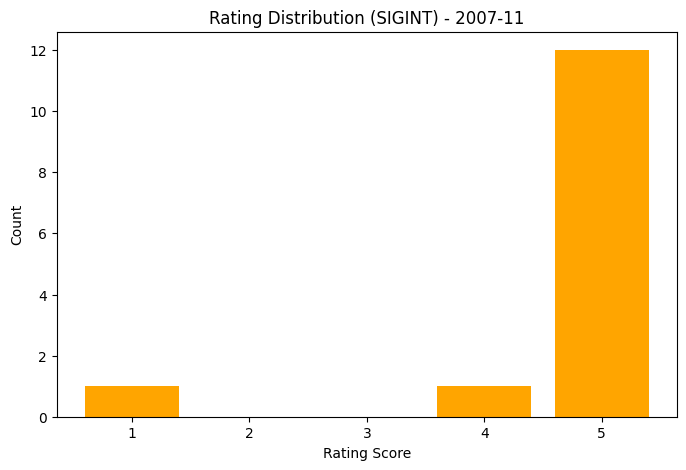

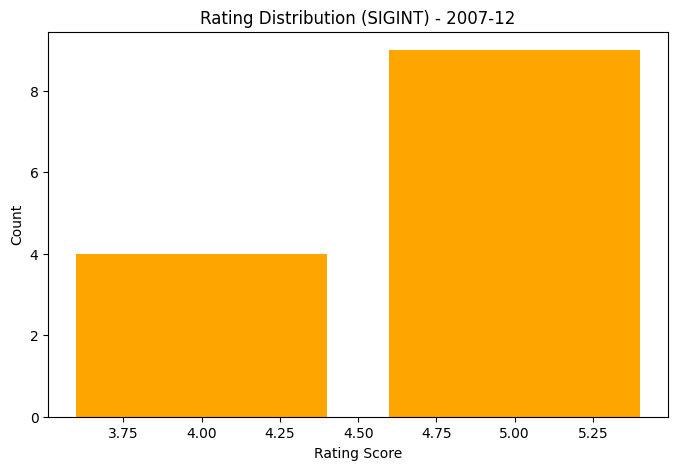

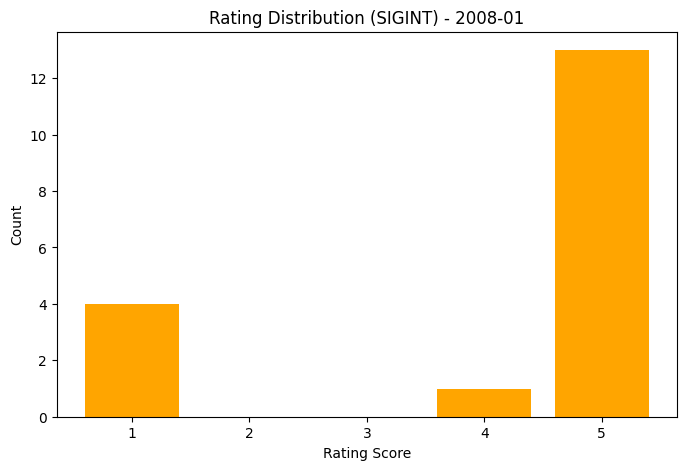

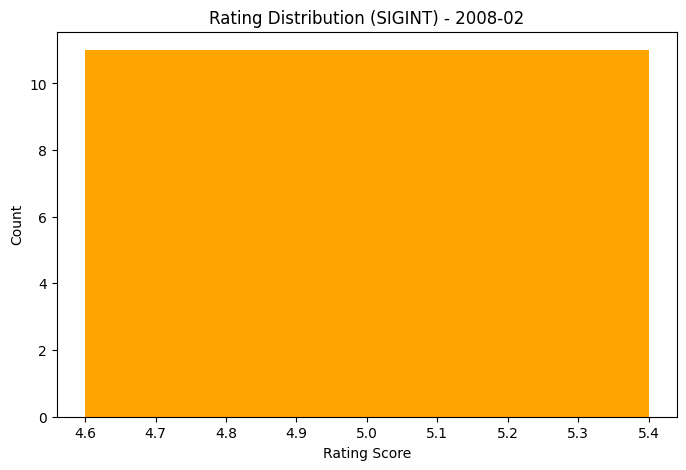

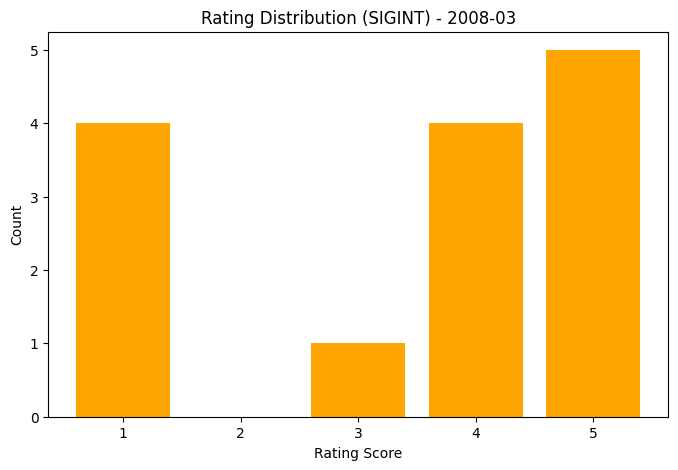

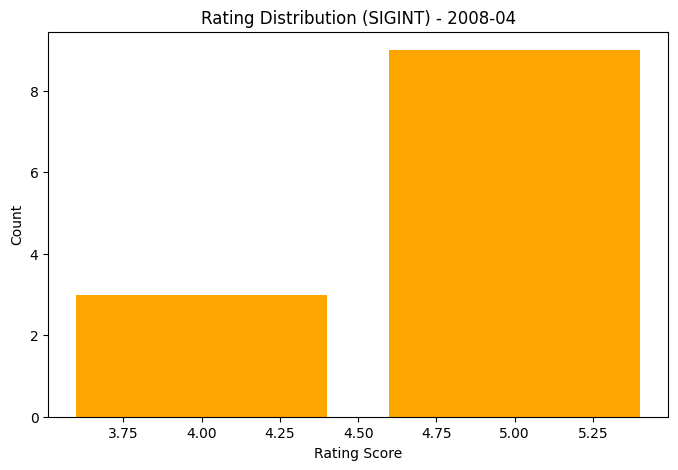

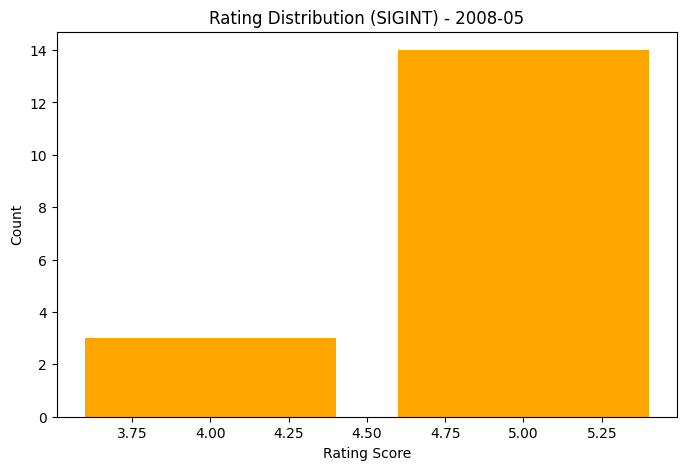

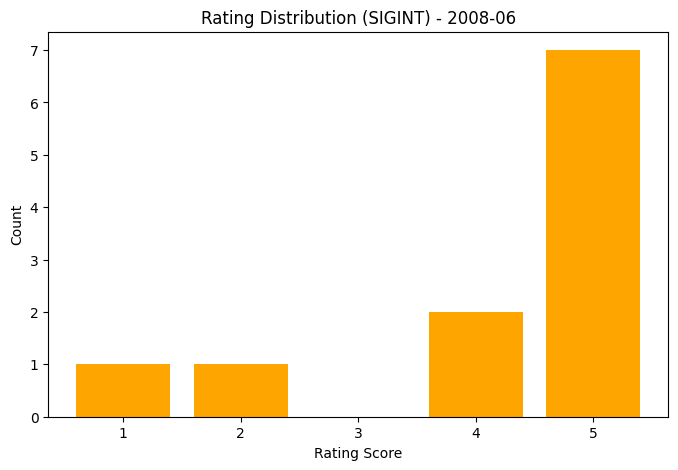

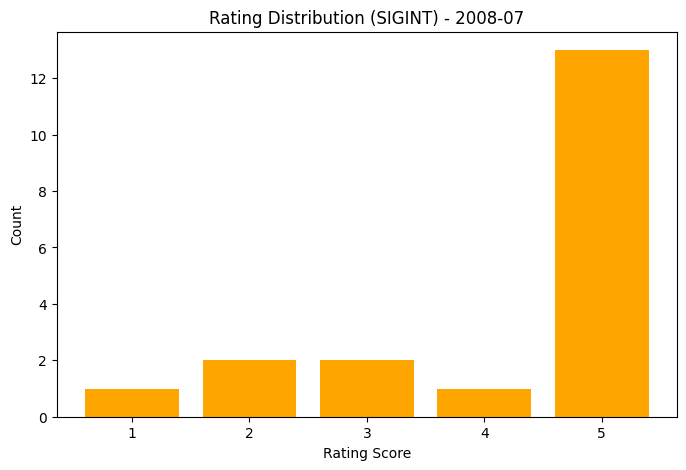

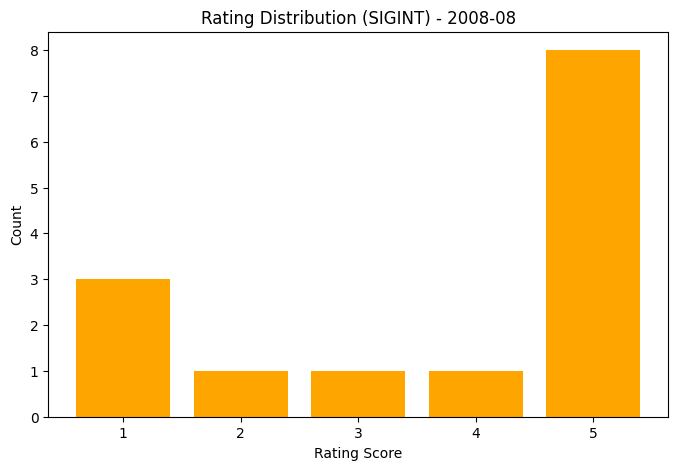

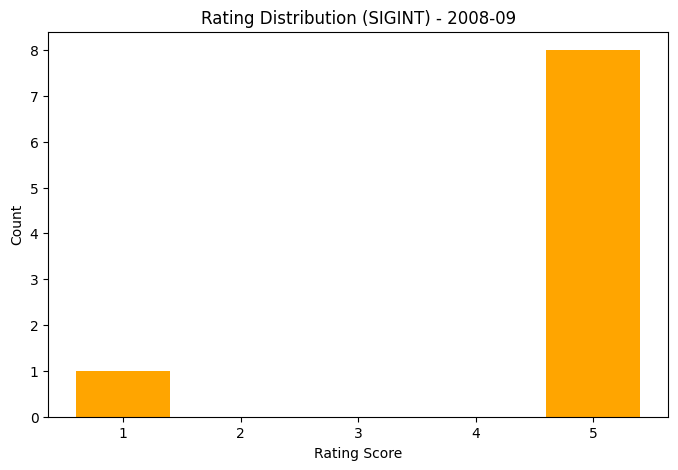

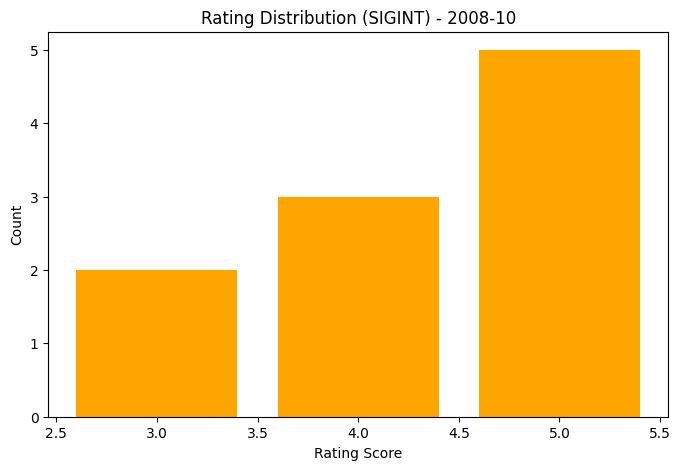

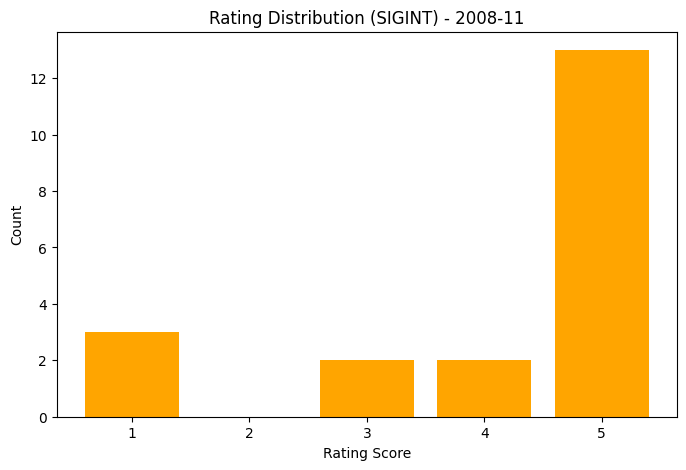

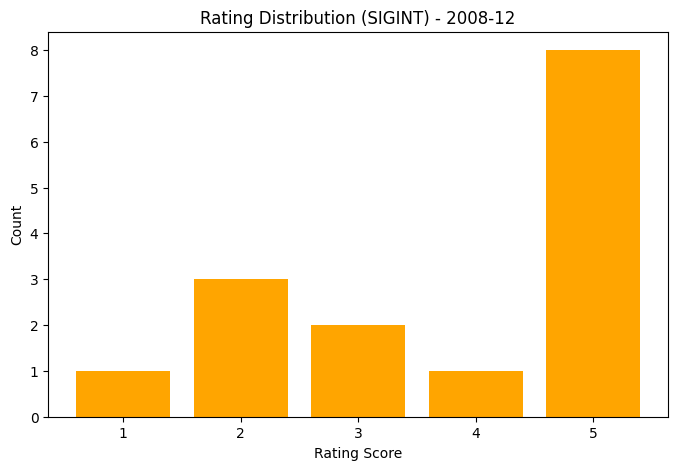

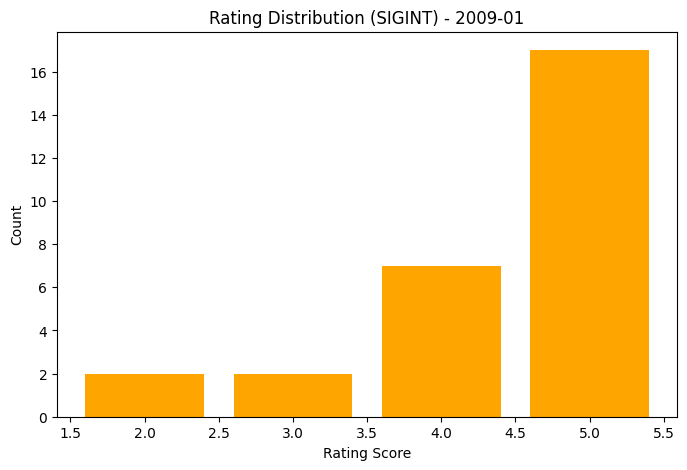

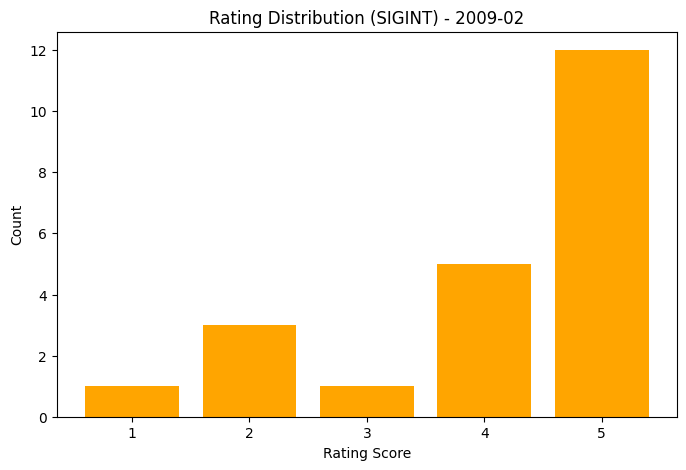

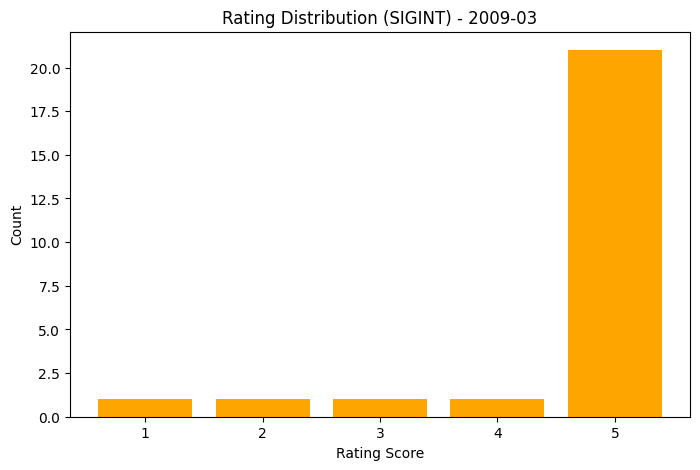

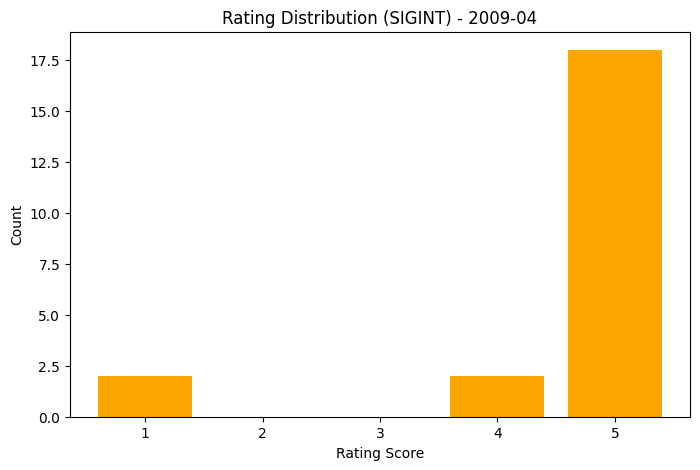

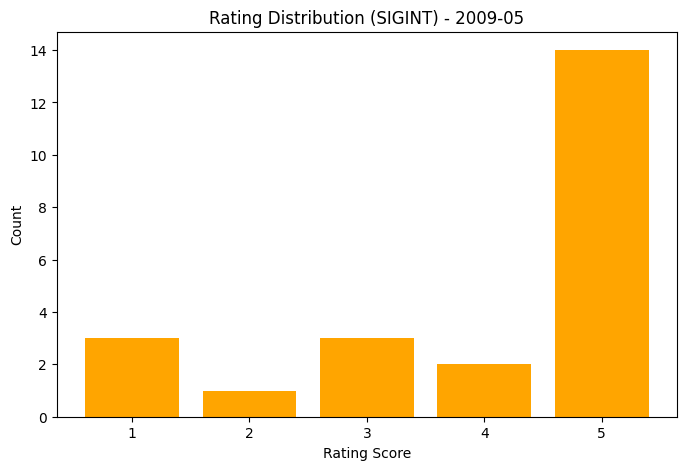

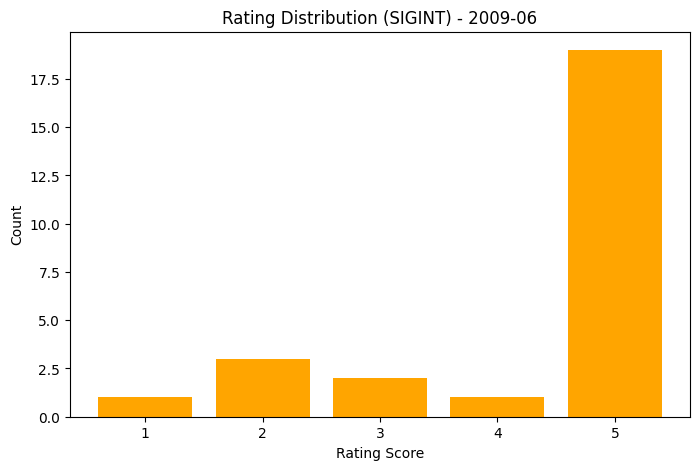

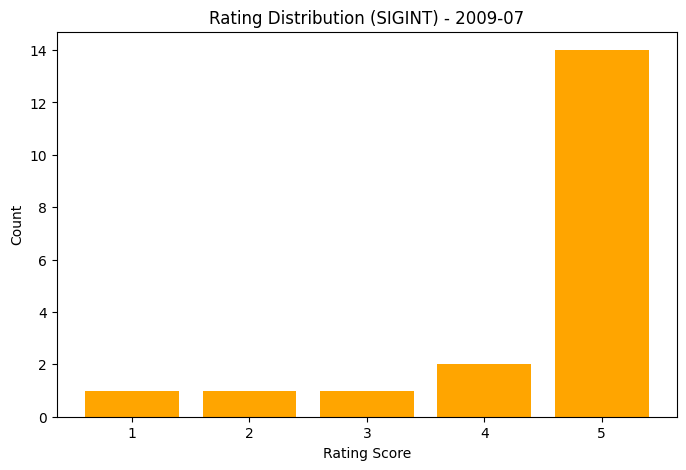

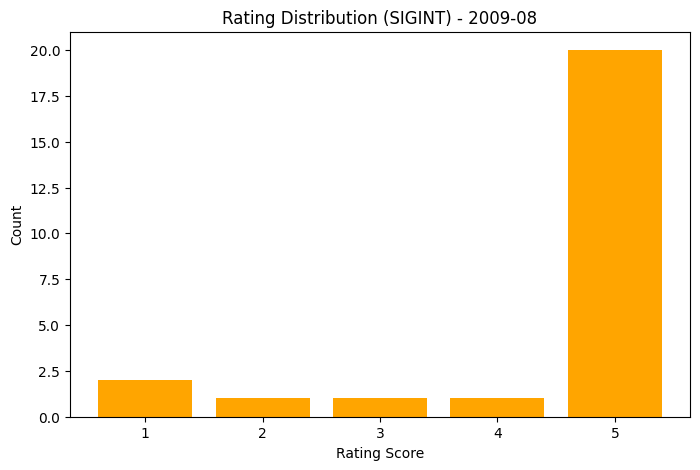

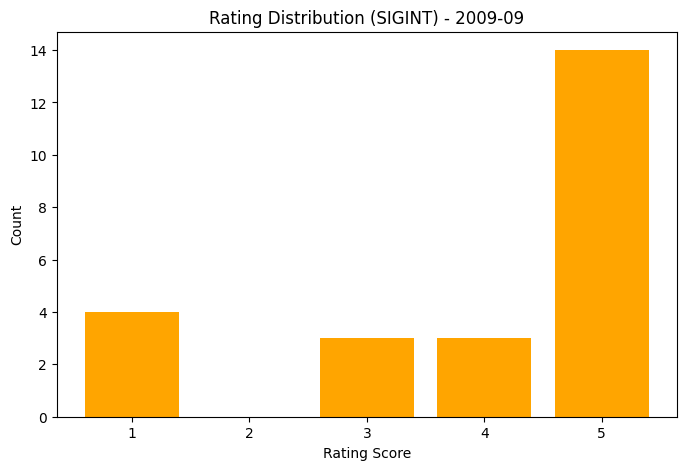

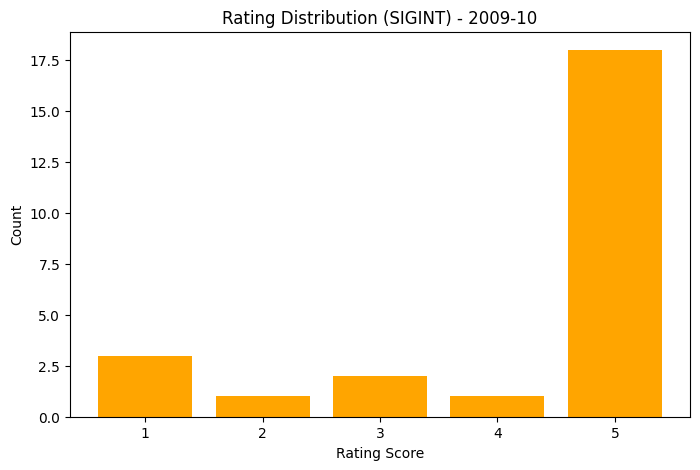

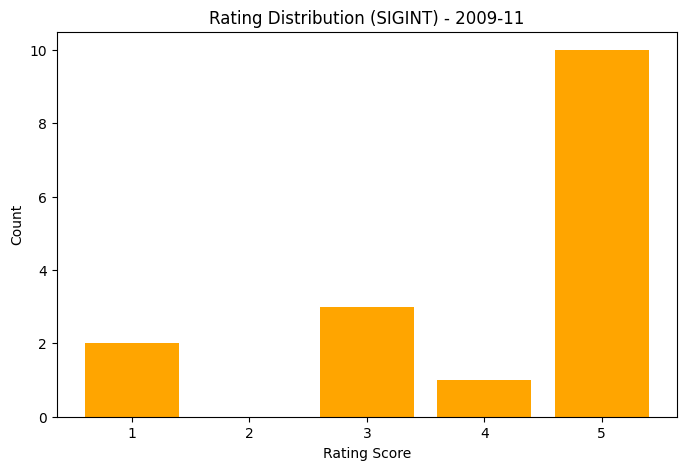

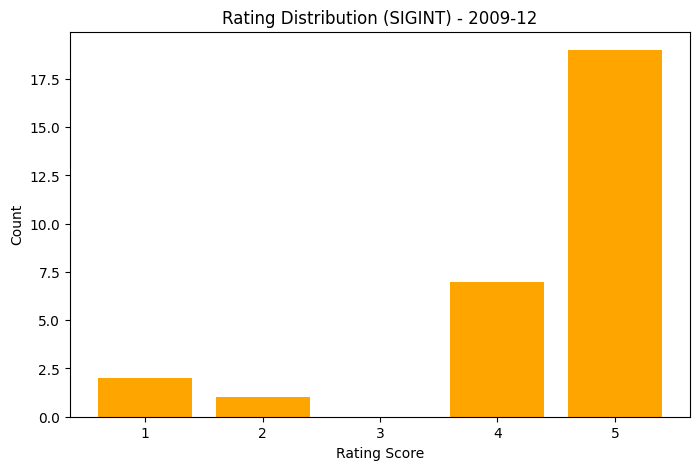

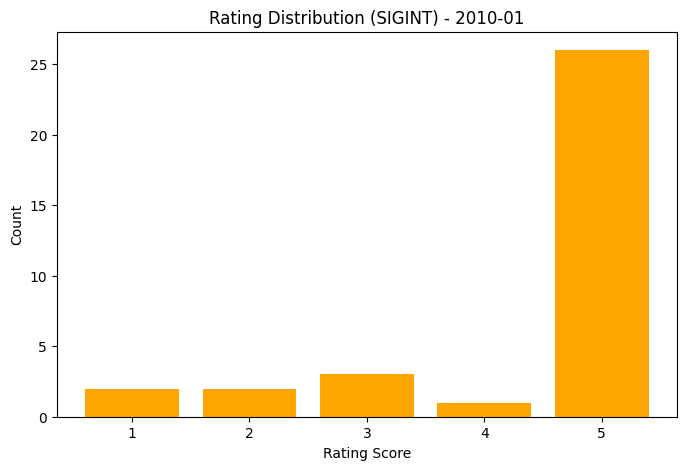

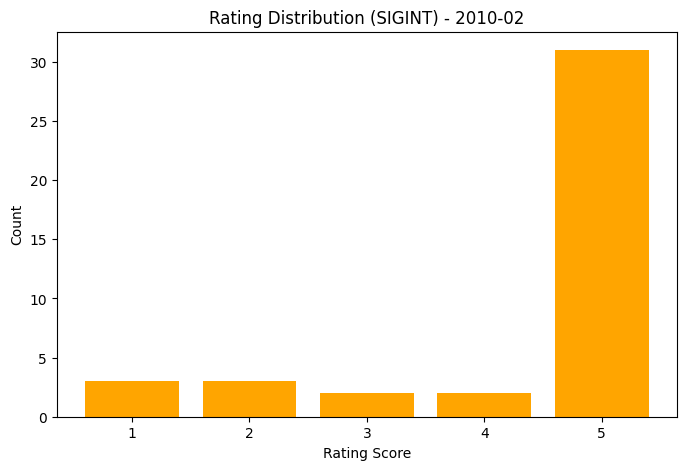

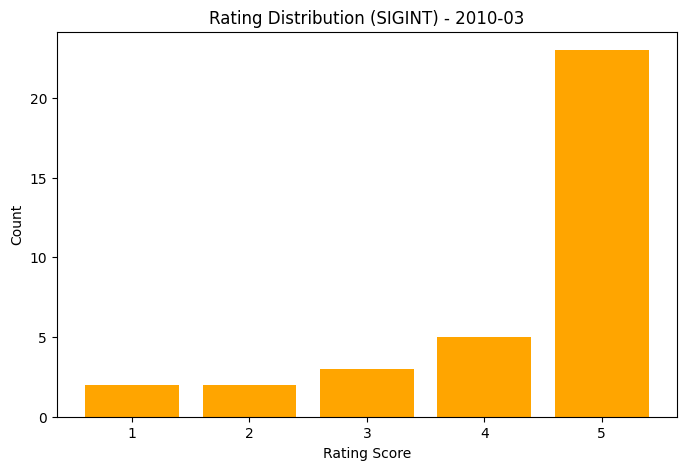

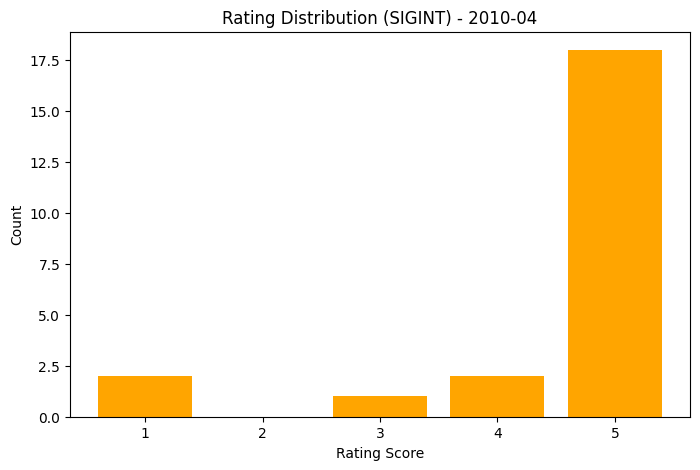

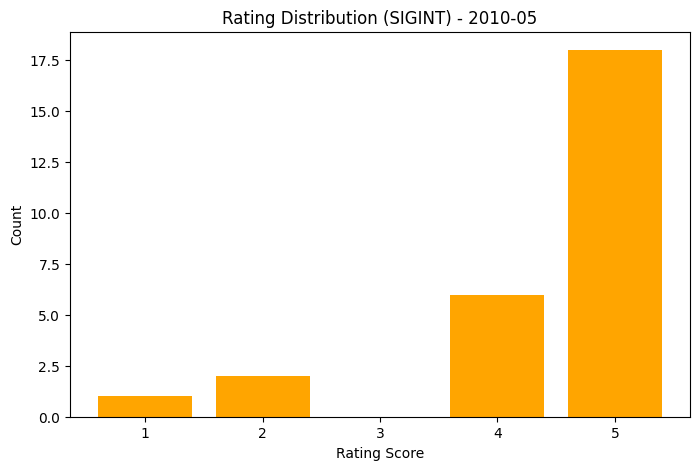

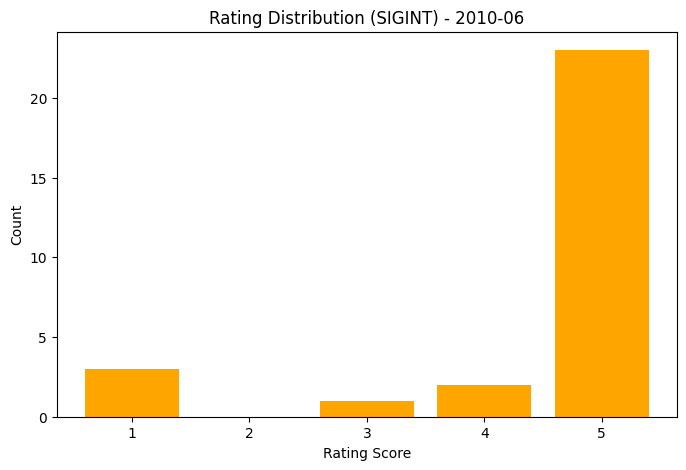

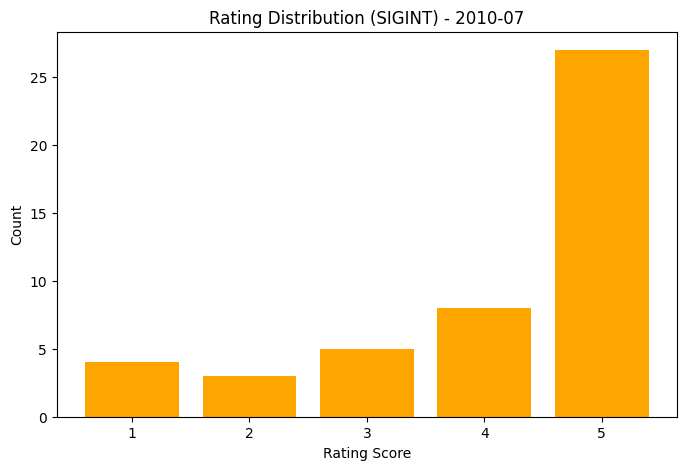

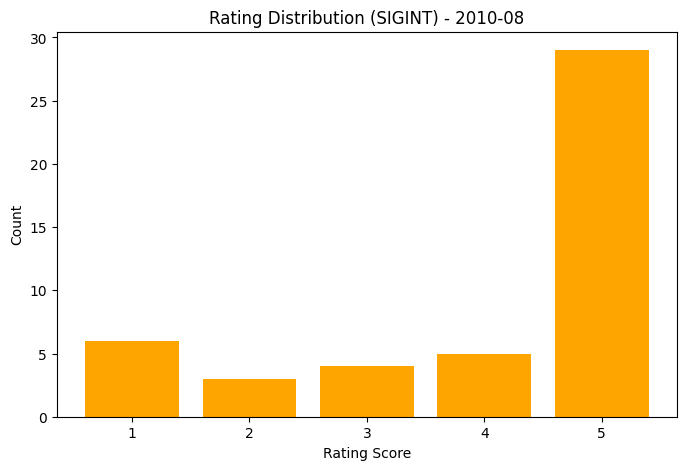

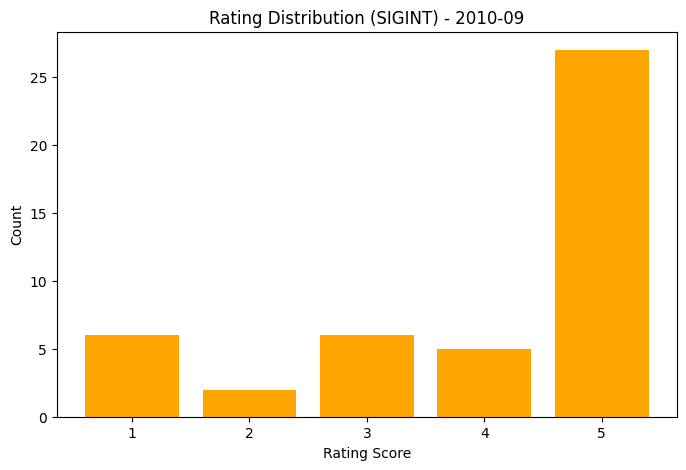

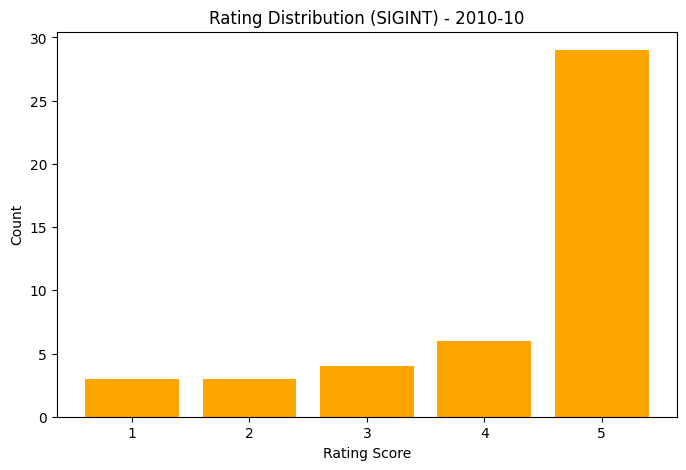

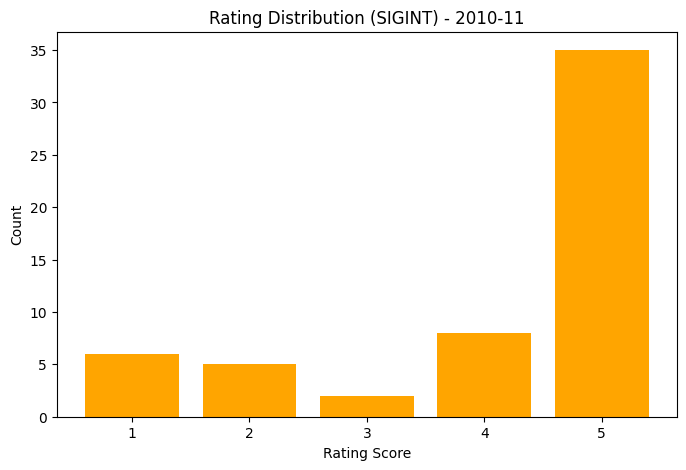

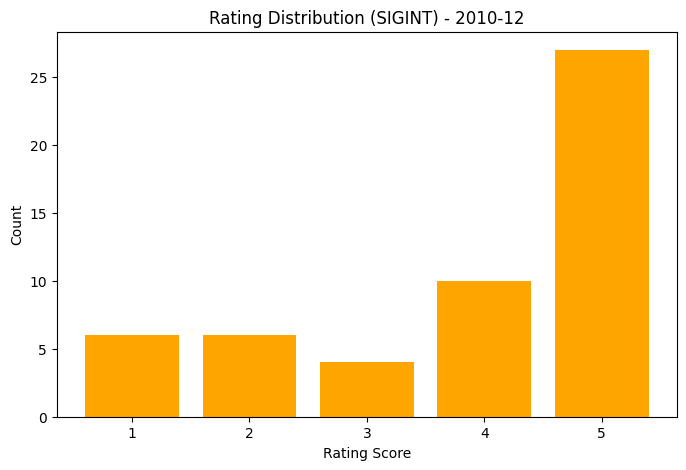

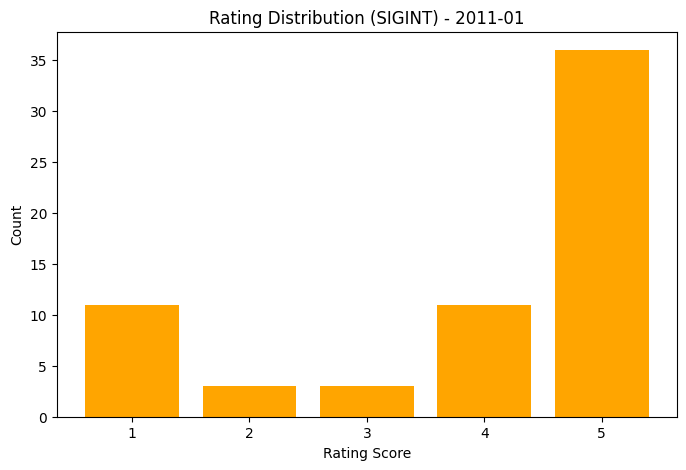

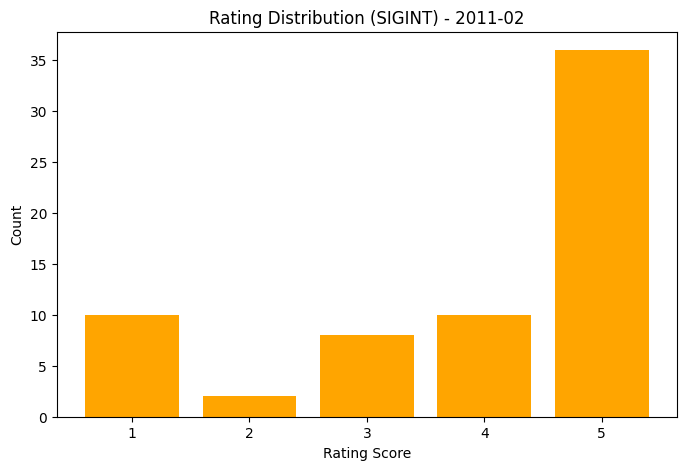

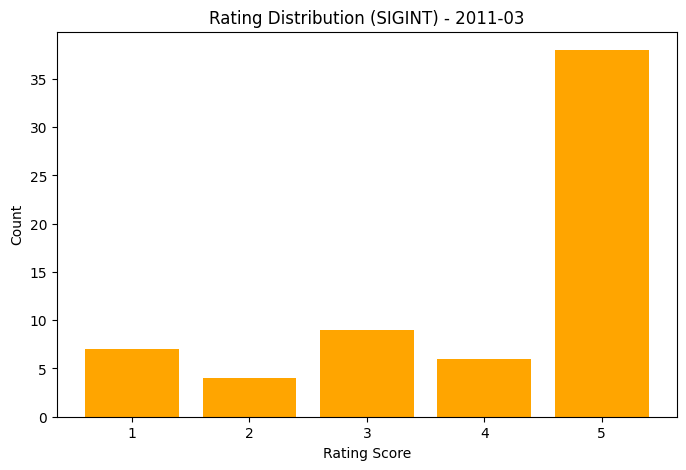

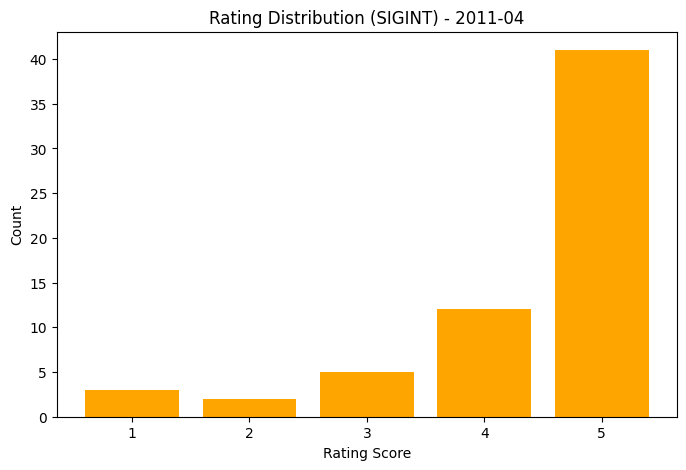

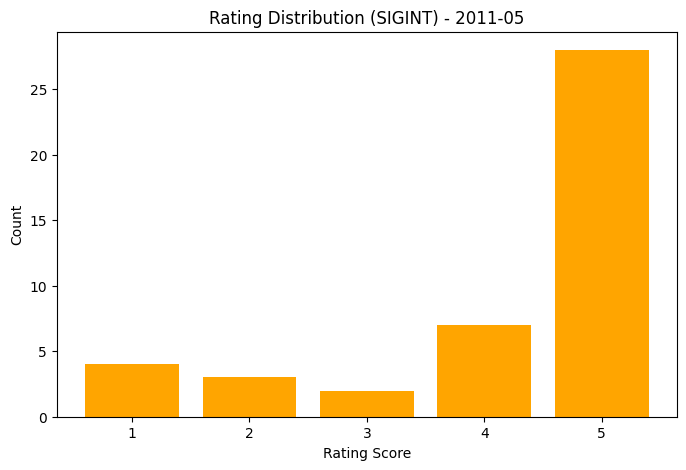

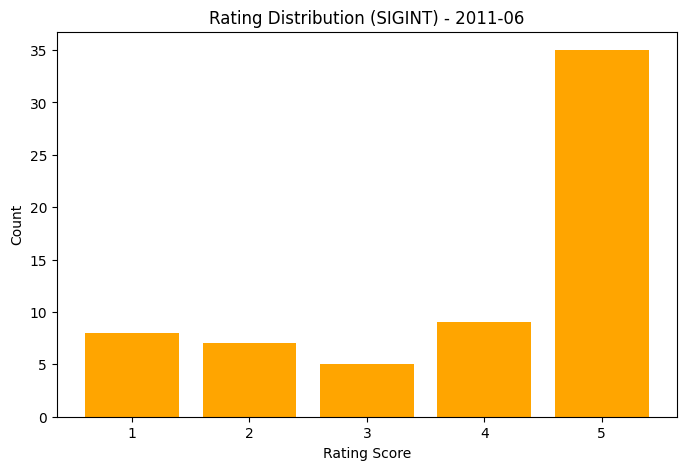

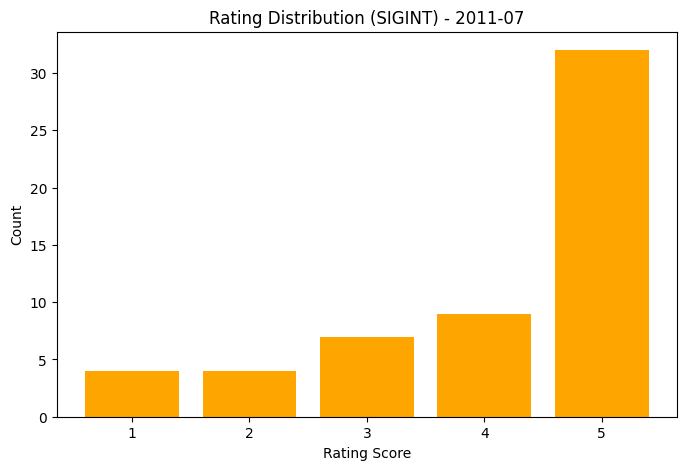

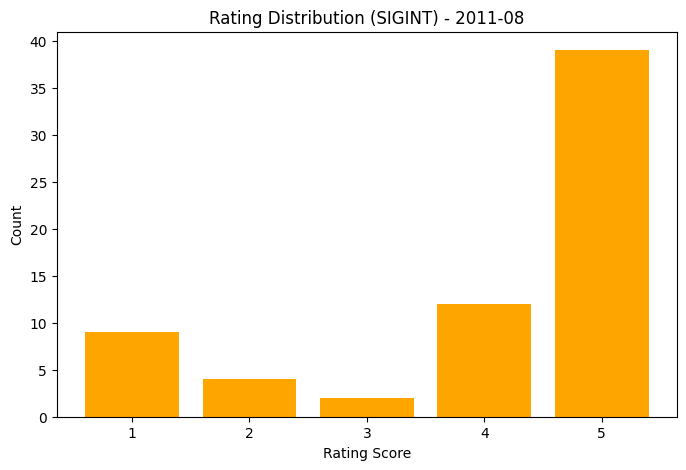

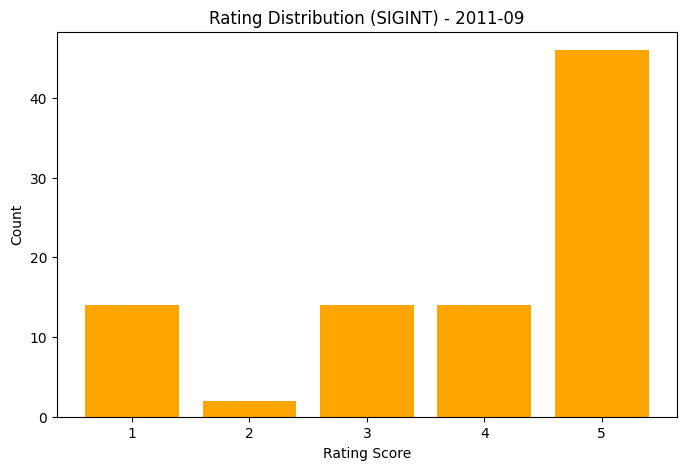

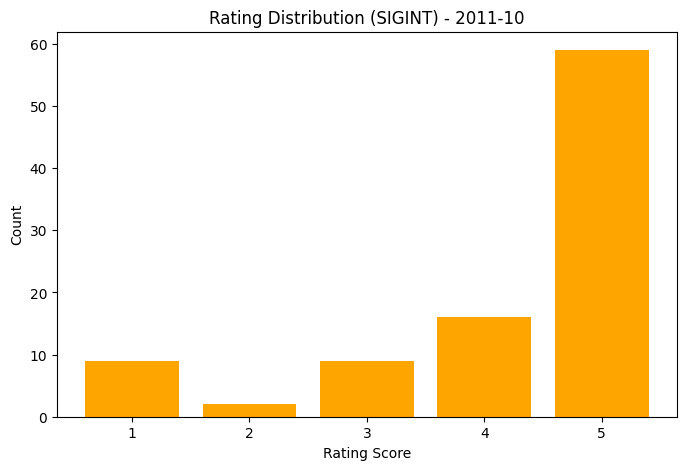

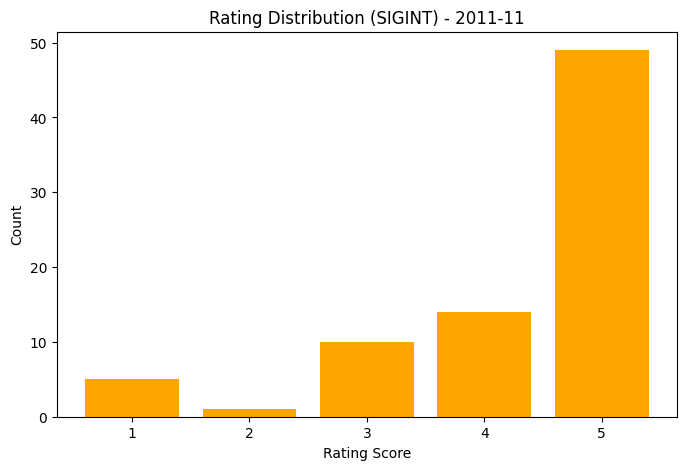

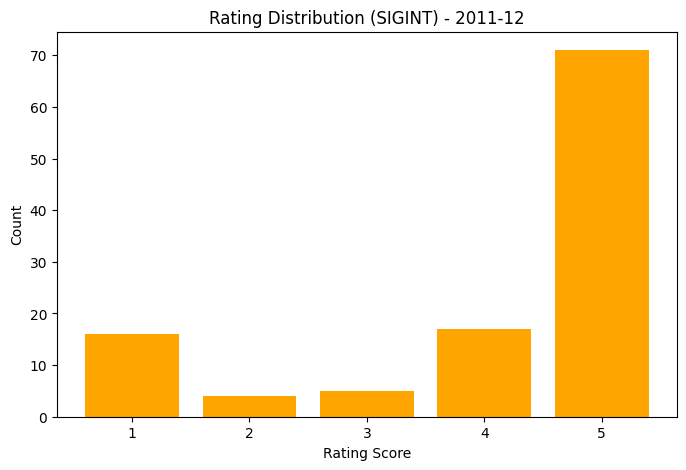

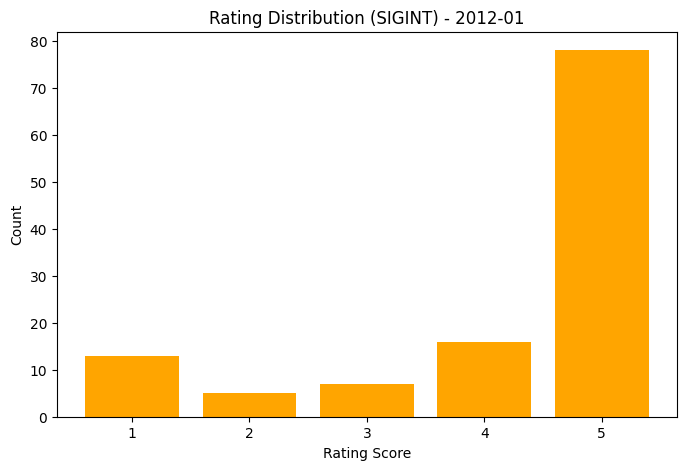

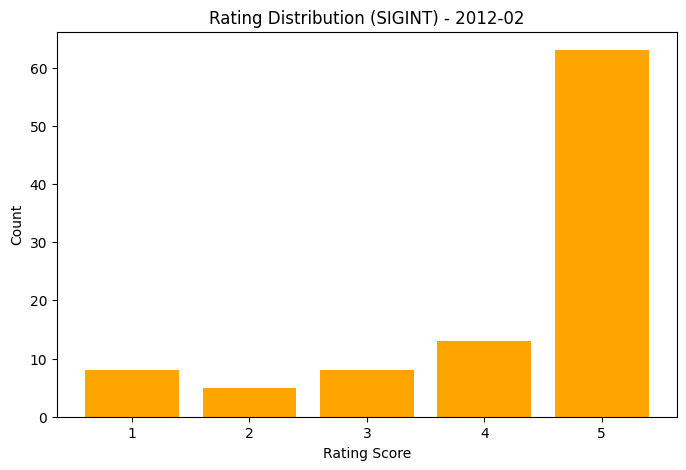

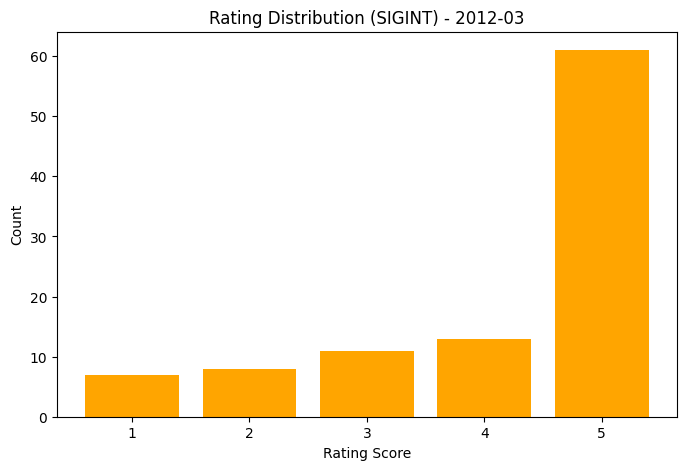

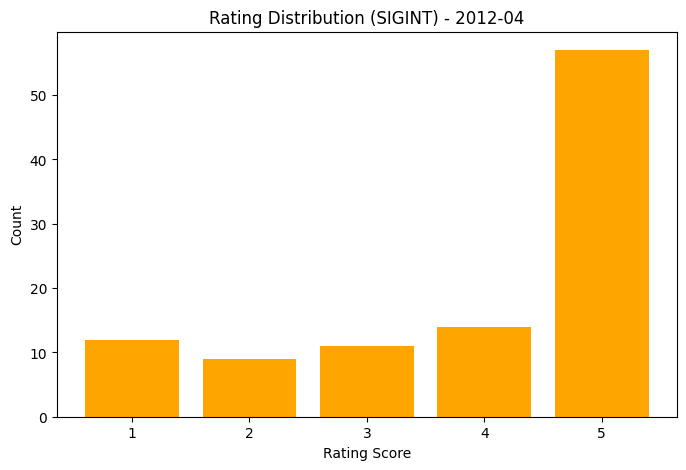

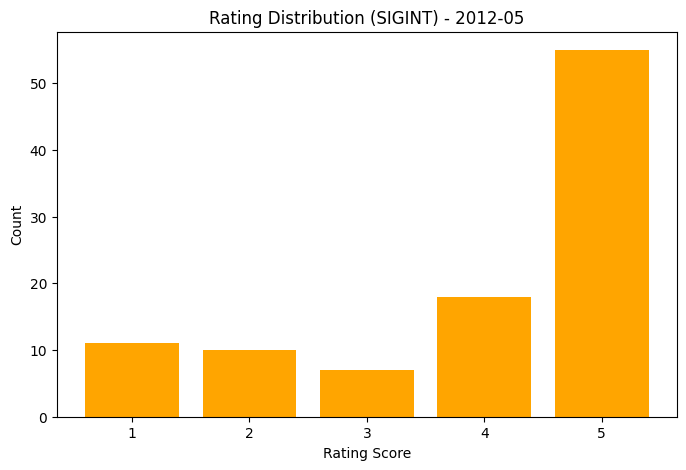

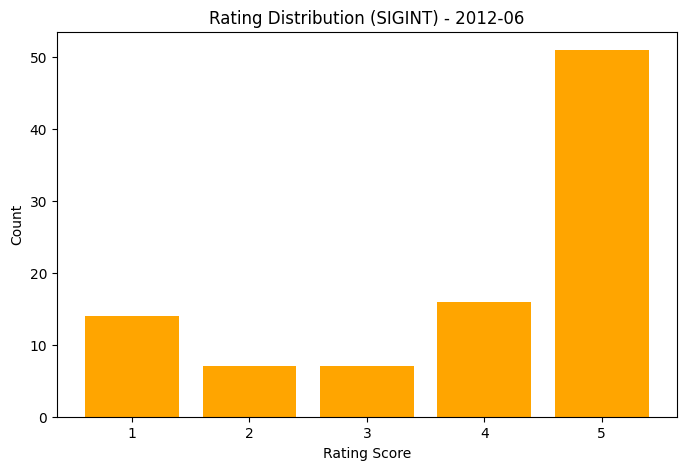

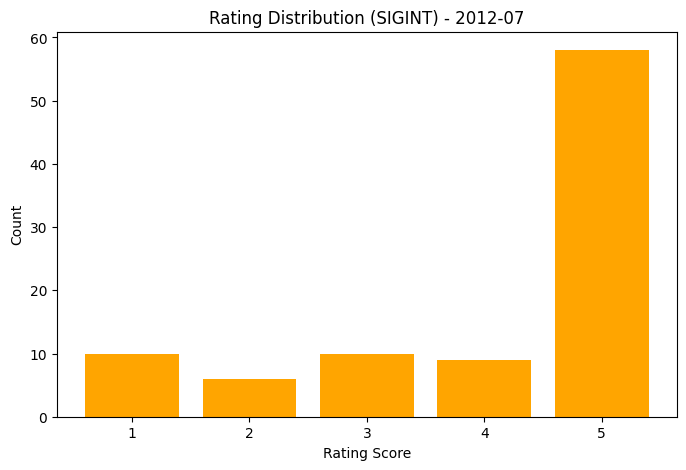

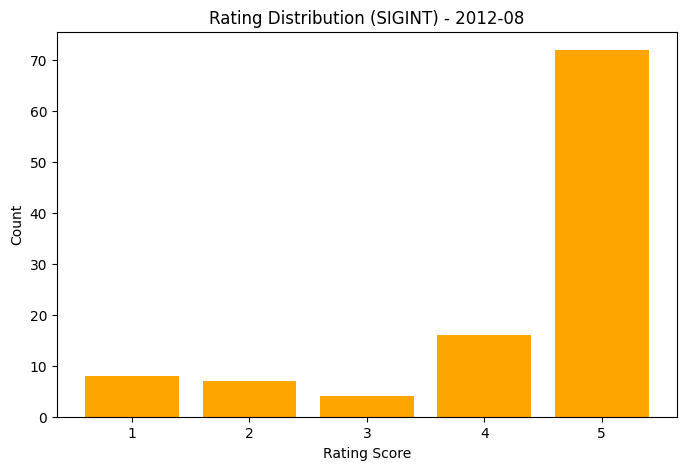

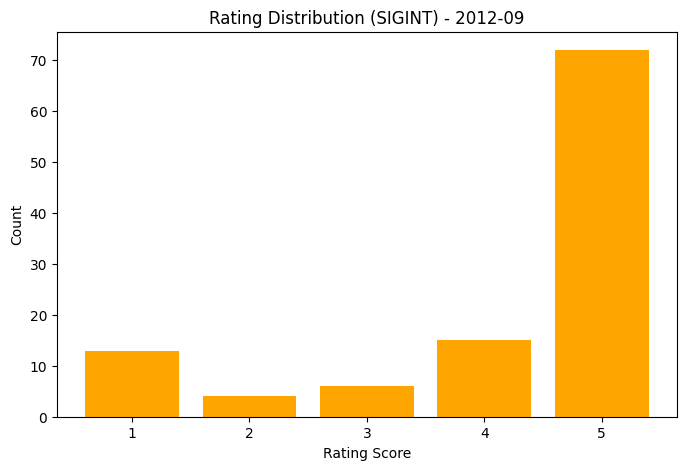

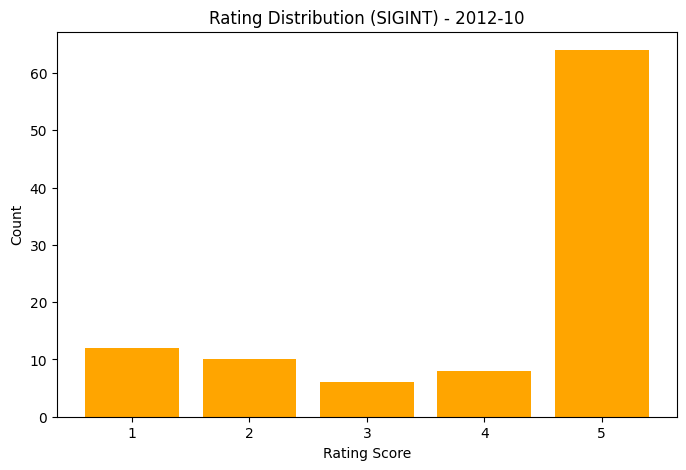

In [28]:
# 9. Visualisasi SIGINT Score (Rating) per Bulan
for month in score_summary['Month'].unique():
    filtered = score_summary[score_summary['Month'] == month]
    plt.figure(figsize=(8,5))
    plt.bar(filtered['Score'], filtered['Count'], color='orange')
    plt.title(f'Rating Distribution (SIGINT) - {month}')
    plt.xlabel('Rating Score')
    plt.ylabel('Count')
    plt.show()

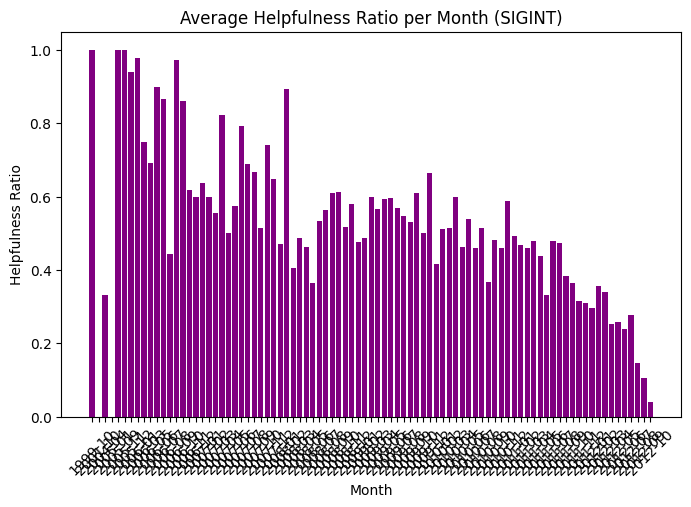

In [29]:
# 10. Visualisasi Helpfulness per Bulan
plt.figure(figsize=(8,5))
plt.bar(helpful_summary['Month'].astype(str), helpful_summary['HelpfulnessRatio'], color='purple')
plt.title('Average Helpfulness Ratio per Month (SIGINT)')
plt.xlabel('Month')
plt.ylabel('Helpfulness Ratio')
plt.xticks(rotation=45)
plt.show()

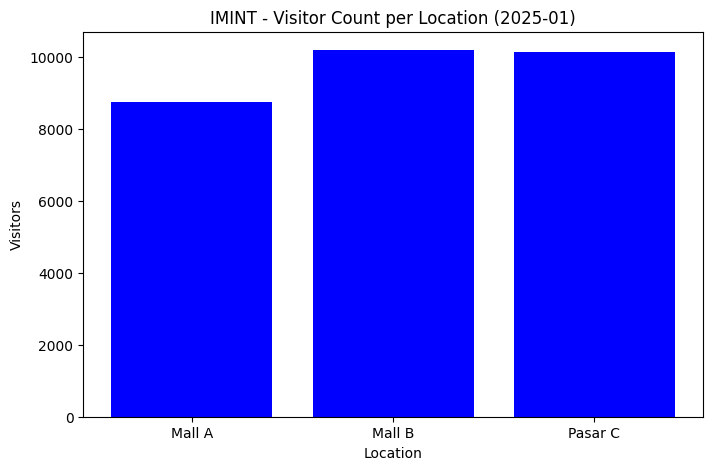

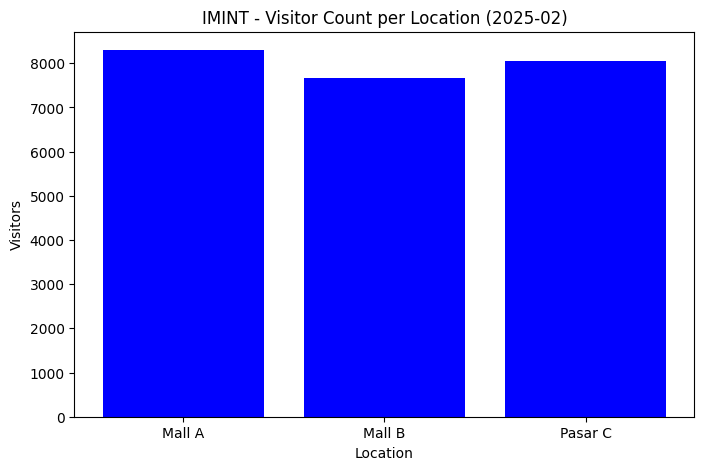

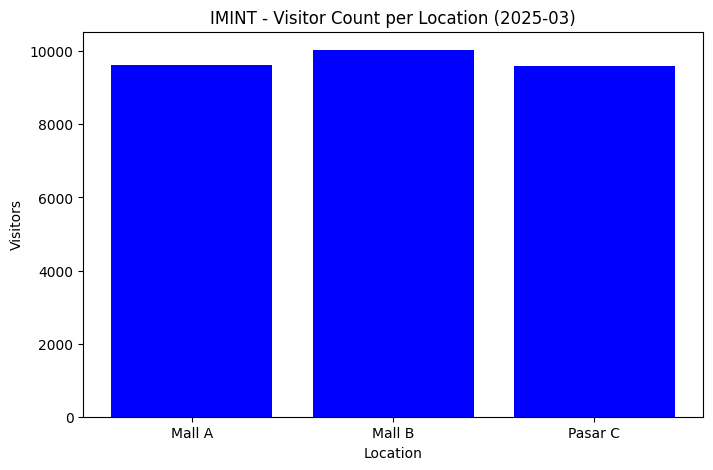

In [30]:
# 11. Visualisasi IMINT per Bulan
imint_summary = imint.groupby(['Month', 'Location'])['Visitors'].sum().reset_index()

for month in imint_summary['Month'].unique():
    filtered = imint_summary[imint_summary['Month'] == month]
    plt.figure(figsize=(8,5))
    plt.bar(filtered['Location'], filtered['Visitors'], color='blue')
    plt.title(f'IMINT - Visitor Count per Location ({month})')
    plt.xlabel('Location')
    plt.ylabel('Visitors')
    plt.show()

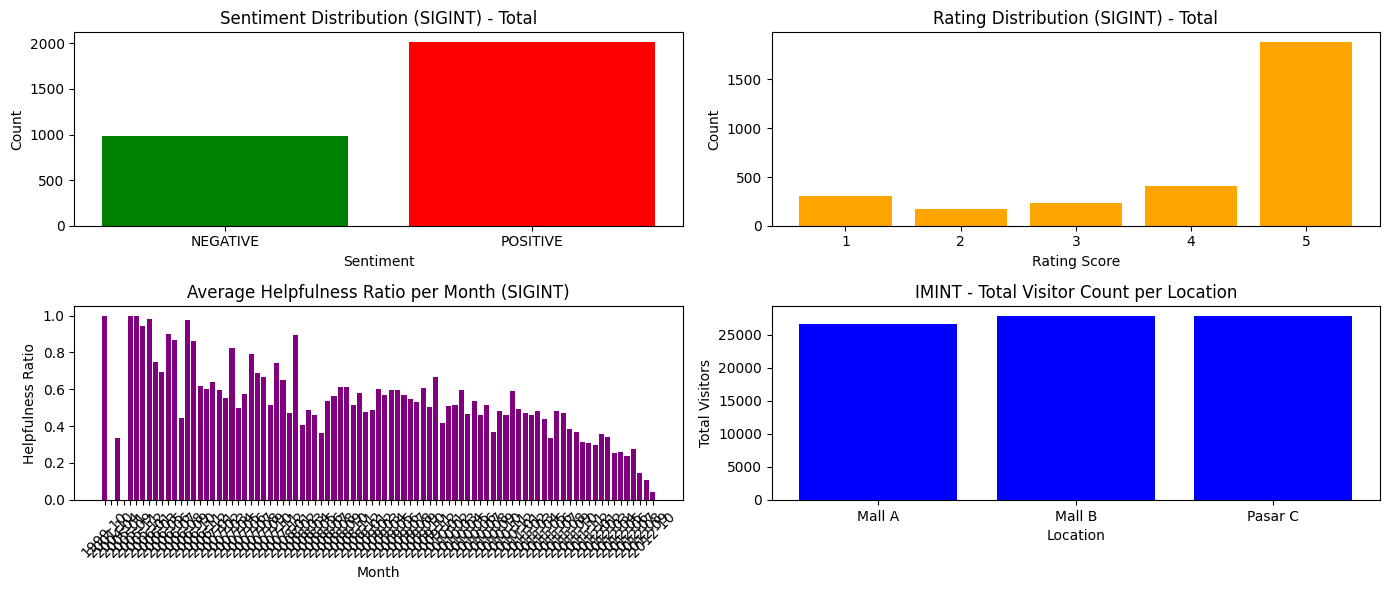

In [31]:
# 1. Visualisasi SIGINT Sentiment Keseluruhan
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
total_sigint_sentiment = sigint.groupby('Sentiment').size().reset_index(name='Count')
plt.bar(total_sigint_sentiment['Sentiment'], total_sigint_sentiment['Count'], color=['green', 'red'])
plt.title('Sentiment Distribution (SIGINT) - Total')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# 2. Visualisasi SIGINT Score (Rating) Keseluruhan
plt.subplot(2, 2, 2)
total_score = sigint.groupby('Score').size().reset_index(name='Count')
plt.bar(total_score['Score'], total_score['Count'], color='orange')
plt.title('Rating Distribution (SIGINT) - Total')
plt.xlabel('Rating Score')
plt.ylabel('Count')

# 3. Visualisasi Helpfulness Keseluruhan
plt.subplot(2, 2, 3)
helpful_summary_total = sigint.groupby('Month').agg({'HelpfulnessRatio': 'mean'}).reset_index()
plt.bar(helpful_summary_total['Month'].astype(str), helpful_summary_total['HelpfulnessRatio'], color='purple')
plt.title('Average Helpfulness Ratio per Month (SIGINT)')
plt.xlabel('Month')
plt.ylabel('Helpfulness Ratio')
plt.xticks(rotation=45)

# 4. Visualisasi IMINT Keseluruhan
plt.subplot(2, 2, 4)
imint_summary_total = imint.groupby('Location')['Visitors'].sum().reset_index()
plt.bar(imint_summary_total['Location'], imint_summary_total['Visitors'], color='blue')
plt.title('IMINT - Total Visitor Count per Location')
plt.xlabel('Location')
plt.ylabel('Total Visitors')

plt.tight_layout()
plt.show()

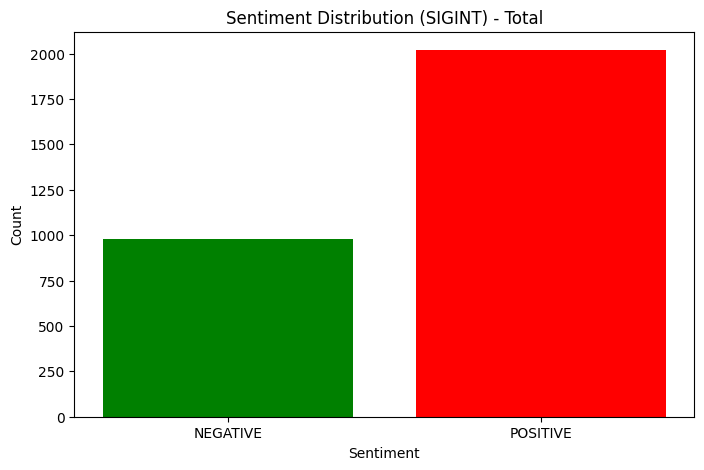

In [32]:
# Visualisasi SIGINT Sentiment Keseluruhan
plt.figure(figsize=(8,5))
total_sigint_sentiment = sigint.groupby('Sentiment').size().reset_index(name='Count')
plt.bar(total_sigint_sentiment['Sentiment'], total_sigint_sentiment['Count'], color=['green', 'red'])
plt.title('Sentiment Distribution (SIGINT) - Total')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

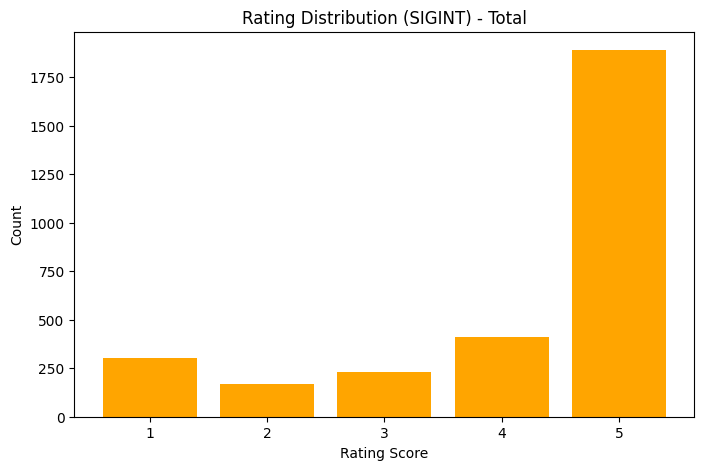

In [33]:
# Visualisasi SIGINT Score (Rating) Keseluruhan
plt.figure(figsize=(8,5))
total_score = sigint.groupby('Score').size().reset_index(name='Count')
plt.bar(total_score['Score'], total_score['Count'], color='orange')
plt.title('Rating Distribution (SIGINT) - Total')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()

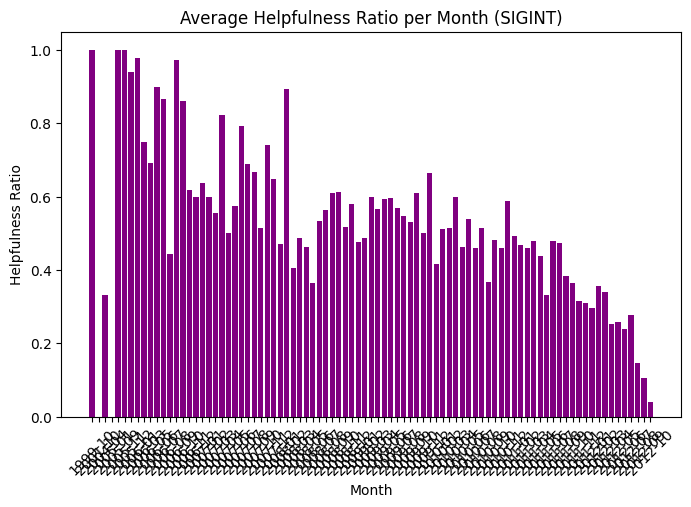

In [34]:
# Visualisasi Helpfulness Keseluruhan
plt.figure(figsize=(8,5))
helpful_summary_total = sigint.groupby('Month').agg({'HelpfulnessRatio': 'mean'}).reset_index()
plt.bar(helpful_summary_total['Month'].astype(str), helpful_summary_total['HelpfulnessRatio'], color='purple')
plt.title('Average Helpfulness Ratio per Month (SIGINT)')
plt.xlabel('Month')
plt.ylabel('Helpfulness Ratio')
plt.xticks(rotation=45)
plt.show()

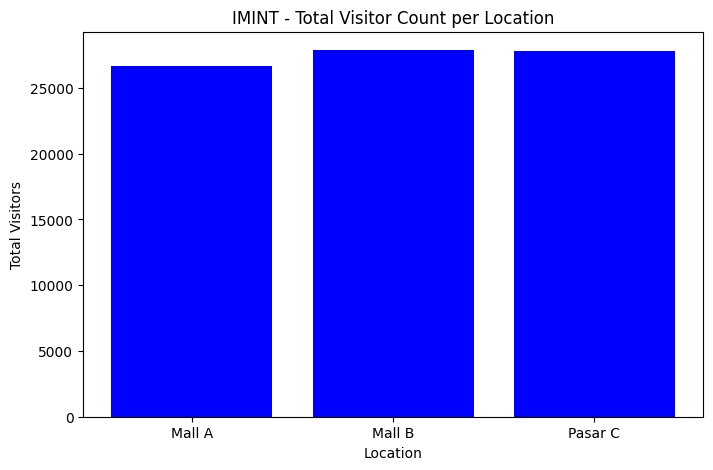

In [35]:
# Visualisasi IMINT Keseluruhan
plt.figure(figsize=(8,5))
imint_summary_total = imint.groupby('Location')['Visitors'].sum().reset_index()
plt.bar(imint_summary_total['Location'], imint_summary_total['Visitors'], color='blue')
plt.title('IMINT - Total Visitor Count per Location')
plt.xlabel('Location')
plt.ylabel('Total Visitors')
plt.show()